# PREDICTION OF FUTURE CLOUD RESOURCES 

## MODULE 1 : FEATURE ENGINEERING, DECOMPOSITION AND CLUSTERING

### Importing  the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import os
import glob
from pandas import read_csv, datetime
from pandas.plotting import autocorrelation_plot
from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize              
import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.linear_model import LassoCV, RidgeCV
from itertools import product                    
from tqdm import tqdm_notebook

%matplotlib inline

import warnings                                
warnings.filterwarnings('ignore')

<ipython-input-1-ef81698f0dd8>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import read_csv, datetime


### Loading the dataset

### Concatenating all the csv files 

### Converting dataframe to time series

In [16]:
hourlydat = concatenated_df.resample('H').sum()

In [17]:
hourlydat.to_csv('hourlydat.csv', sep = ',')

In [18]:
#data = pd.read_csv("hourlydat.csv")
data=hourlydat[['Disk read throughput [KB/s]' ,'CPU usage [MHZ]']]
data.head()

Disk read throughput [KB/s]  CPU usage [MHZ]
Timestamp                                                        
2013-06-30 22:00:00                 7.029850e+05     1.677022e+06
2013-06-30 23:00:00                 9.123973e+05     1.817519e+06
2013-07-01 00:00:00                 9.670129e+05     1.719936e+06
2013-07-01 01:00:00                 1.628856e+06     1.649799e+06
2013-07-01 02:00:00                 1.413094e+06     1.731963e+06

### Decomposing CPU usage

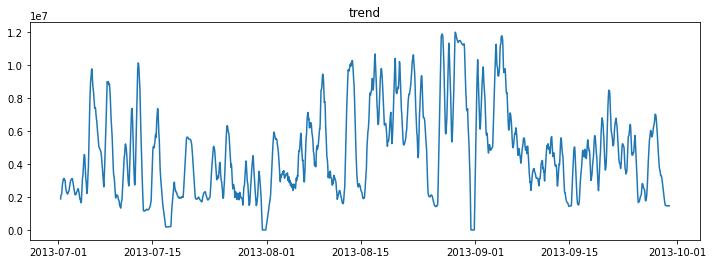

In [19]:
df=hourlydat['CPU usage [MHZ]']
t = df.rolling(window=12).mean()
plt.figure(figsize=(12,4));
plt.plot(t);
plt.title('trend');

<Figure size 1080x360 with 0 Axes>

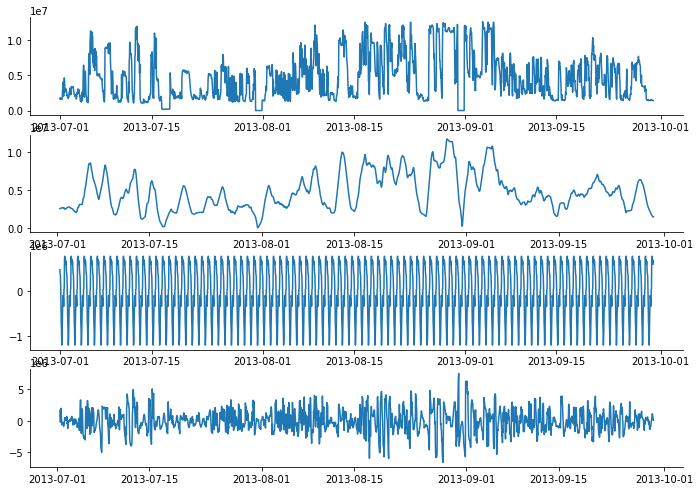

In [20]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose




decomp = seasonal_decompose(hourlydat['CPU usage [MHZ]'], model="additive")

plt.figure(figsize=(15,5))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(11.7, 8.27)

ax1.plot(hourlydat['CPU usage [MHZ]'])
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(decomp.resid)
sns.despine()

### Clustering CPU usage

In [21]:
!pip install minisom
!pip install tslearn

In [22]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [23]:
mySeries = []
namesofMySeries = []
df = pd.read_csv("hourlydat.csv")
df =  df.loc[:,["Timestamp","CPU usage [MHZ]"]]
        # While we are at it I just filtered the columns that we will be working on
df.set_index("Timestamp",inplace=True)
        # ,set the date columns as index
df.sort_index(inplace=True)
        # and lastly, ordered the data according to our date index
mySeries.append(df)
#namesofMySeries.append([:-4])

In [24]:
print(mySeries)


[                     CPU usage [MHZ]
Timestamp                           
2013-06-30 22:00:00     1.677022e+06
2013-06-30 23:00:00     1.817519e+06
2013-07-01 00:00:00     1.719936e+06
2013-07-01 01:00:00     1.649799e+06
2013-07-01 02:00:00     1.731963e+06
...                              ...
2013-09-29 17:00:00     1.420654e+06
2013-09-29 18:00:00     1.428400e+06
2013-09-29 19:00:00     1.429791e+06
2013-09-29 20:00:00     1.428487e+06
2013-09-29 21:00:00     1.422804e+06

[2184 rows x 1 columns]]


In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=3)

In [27]:
kmeans.fit(data)

KMeans(n_clusters=3)

In [28]:
kmeans.cluster_centers_

array([[  869252.06704372,  5706834.65499399],
       [  762193.77393375, 10348830.38885055],
       [  836397.01950554,  2051335.1744206 ]])

In [29]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [30]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
dict_data

{0: 765, 1: 360, 2: 1059}

In [31]:
data["cluster"] = kmeans.labels_

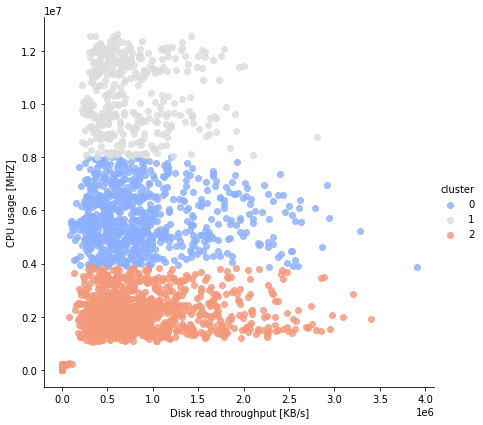

In [32]:
sns.lmplot(x='Disk read throughput [KB/s]',y='CPU usage [MHZ]', data=data, hue='cluster', palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [33]:
kmeans.inertia_

3056042450918936.0

In [34]:
kmeans.score

<bound method KMeans.score of KMeans(n_clusters=3)>

In [35]:
data.head(10)


Disk read throughput [KB/s]  CPU usage [MHZ]  cluster
Timestamp                                                                 
2013-06-30 22:00:00                 7.029850e+05     1.677022e+06        2
2013-06-30 23:00:00                 9.123973e+05     1.817519e+06        2
2013-07-01 00:00:00                 9.670129e+05     1.719936e+06        2
2013-07-01 01:00:00                 1.628856e+06     1.649799e+06        2
2013-07-01 02:00:00                 1.413094e+06     1.731963e+06        2
2013-07-01 03:00:00                 8.134976e+05     1.667130e+06        2
2013-07-01 04:00:00                 2.022024e+06     1.626906e+06        2
2013-07-01 05:00:00                 6.728464e+05     1.592491e+06        2
2013-07-01 06:00:00                 6.013745e+05     1.621074e+06        2
2013-07-01 07:00:00                 6.110934e+05     1.923474e+06        2

## MODULE 2 : UNDERSTANDING CORRELATIONS AND DATA VISUALIZATION

### Autocorrelations of hourly transmitted, received, and CPU usage

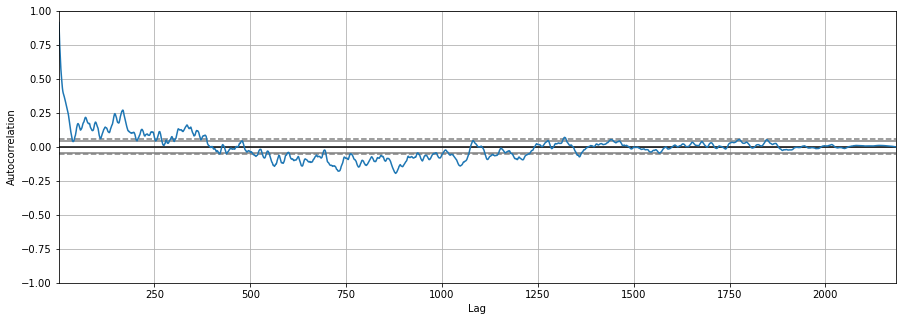

In [36]:
plt.figure(figsize=(15,5))
pd.plotting.autocorrelation_plot(hourlydat['CPU usage [MHZ]']);

In [37]:
overprovision = pd.DataFrame(hourlydat['CPU usage [MHZ]'])
overprovision['CPU capacity provisioned'] = pd.DataFrame(hourlydat['CPU capacity provisioned [MHZ]'])


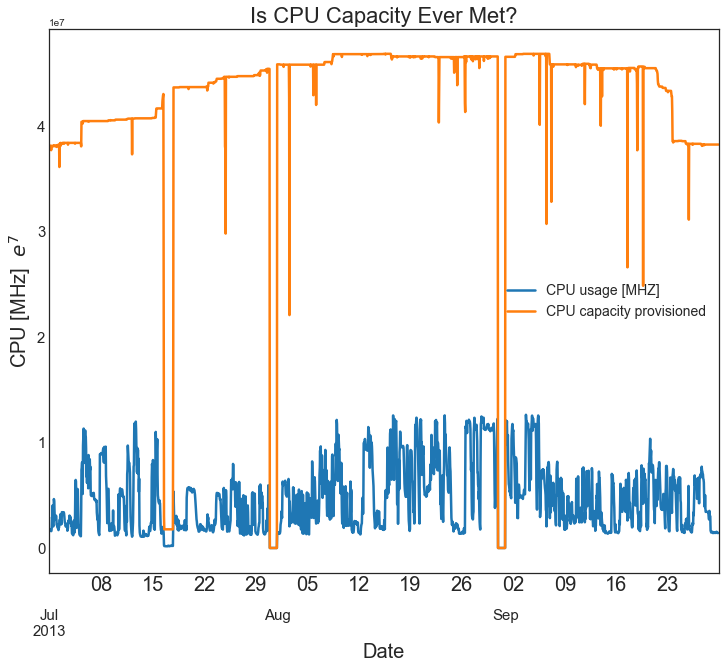

In [38]:
plt.style.use('seaborn-white')
overprovision.plot(figsize = (12,10),linewidth=2.5, fontsize=20)
plt.title('Is CPU Capacity Ever Met?',fontsize=22)
plt.ylabel((r'CPU [MHz]  $e^{7}$'), fontsize=20);
plt.xlabel('Date', fontsize=20);
plt.tick_params(labelsize=15)
plt.xticks( fontsize = 15)
plt.legend(loc="best", fontsize =14)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
plt.savefig('CPU_cap_under.png')
plt.show()

### One month CPU provision

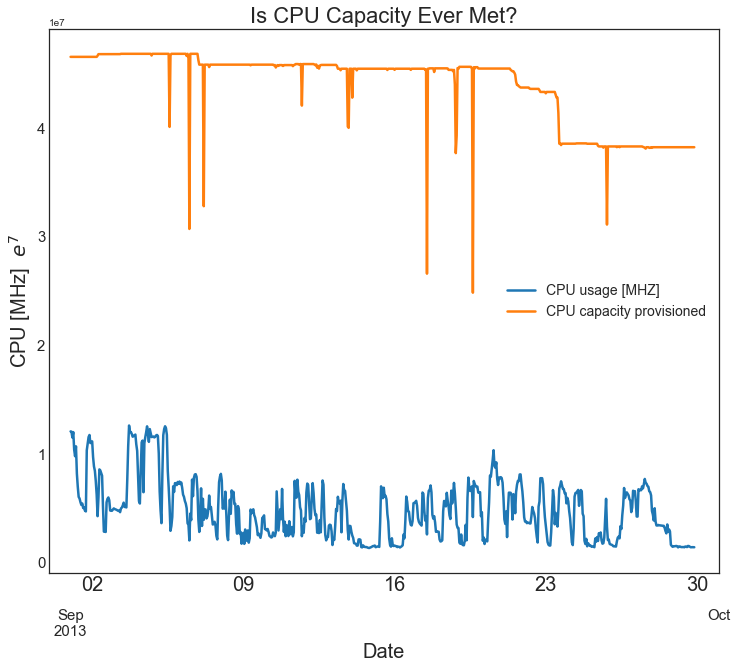

In [39]:
import datetime
plt.style.use('seaborn-white')
overprovision[(overprovision.index > '2013-08-31 23:59:00') & (overprovision.index < '2013-10-01 0:00:00')].plot(figsize = (12,10),linewidth=2.5,fontsize=20)
plt.title('Is CPU Capacity Ever Met?',fontsize=22)
plt.ylabel((r'CPU [MHz]  $e^{7}$'), fontsize=20);
plt.xlabel('Date', fontsize=20);
plt.tick_params(labelsize=15)
plt.xlim([datetime.date(2013, 8, 31), datetime.date(2013, 10, 1)])
plt.xticks( fontsize = 15)
plt.legend(loc="best", fontsize =14)
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = (1,6))
plt.savefig('CPU_cap_under_1mo.png')
plt.show()

In [40]:
print("avg CPU Percent Usage is only: " + str(round(concatenated_df['CPU usage [%]'].mean(),2)))
print("min CPU Percent Usage is: " + str(round(concatenated_df['CPU usage [%]'].min(),2)))
print("maximum CPU Percent Usage is: " + str(round(concatenated_df['CPU usage [%]'].max(),2)))

avg CPU Percent Usage is only: 6.01
min CPU Percent Usage is: 0.0
maximum CPU Percent Usage is: 182.13


### Aggregated graphs

In [41]:
cpu = concatenated_df[['CPU usage [MHZ]']]
receive = concatenated_df[['Network received throughput [KB/s]']]
transmit = concatenated_df[['Network transmitted throughput [KB/s]']]
provisioned = concatenated_df[['CPU capacity provisioned [MHZ]']]

hourlycpu = cpu.resample('H').sum()
hourlytransmit = transmit.resample('H').sum()
hourlyreceive = receive.resample('H').sum()
hourlyprovisioned = provisioned.resample('H').sum()

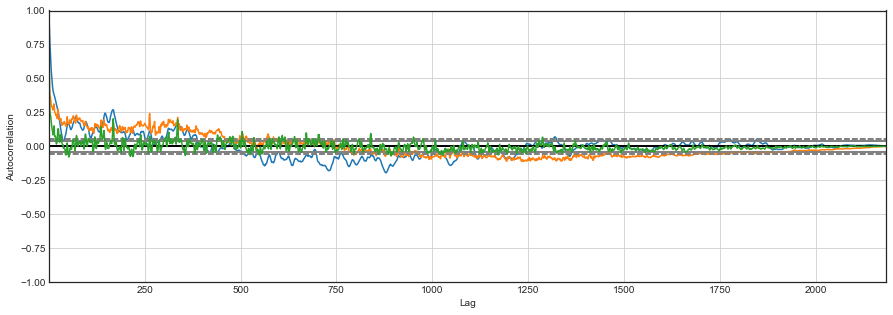

In [42]:
plt.figure(figsize=(15,5))

pd.plotting.autocorrelation_plot(hourlycpu);
pd.plotting.autocorrelation_plot(hourlyreceive);
pd.plotting.autocorrelation_plot(hourlytransmit);

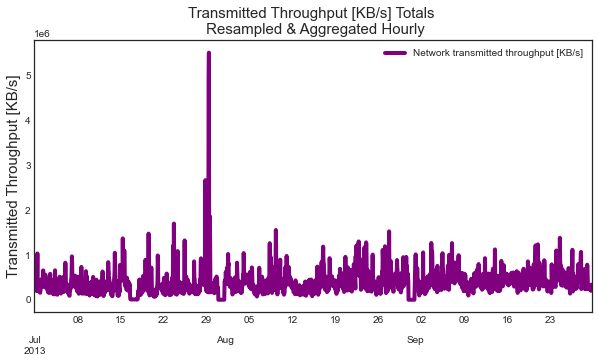

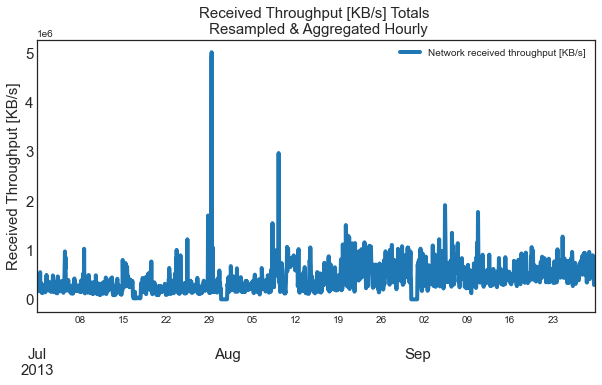

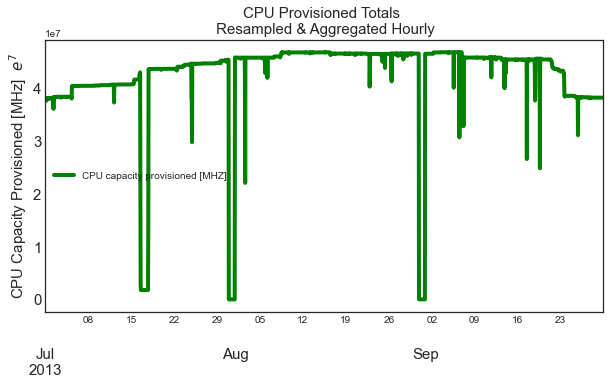

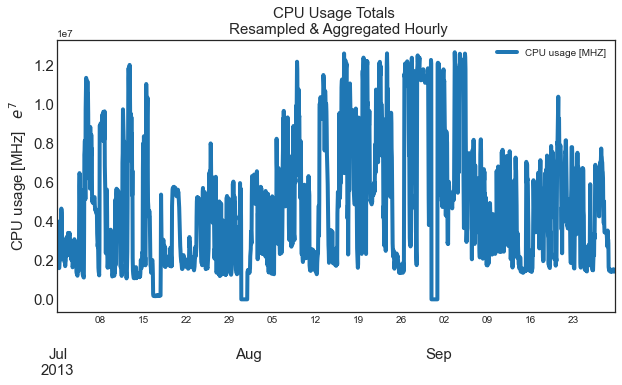

In [43]:
hourlytransmit.plot(color = "purple",linewidth = 4,  figsize=(10, 5))
plt.title('Transmitted Throughput [KB/s] Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('Transmitted Throughput [KB/s]', fontsize=15);
plt.xlabel('', fontsize=15);

hourlyreceive.plot( linewidth = 4, figsize=(10, 5))
plt.title('Received Throughput [KB/s] Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('Received Throughput [KB/s]', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

hourlyprovisioned.plot(color = "g", linewidth = 4, figsize=(10, 5))
plt.title('CPU Provisioned Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('CPU Capacity Provisioned [MHz]  $e^{7}$', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

hourlycpu.plot(linewidth = 4, figsize=(10, 5))
plt.title('CPU Usage Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('CPU usage [MHz]   $e^{7}$', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

### Max value graphs

In [44]:
cpu = concatenated_df[['CPU usage [MHZ]']]
receive = concatenated_df[['Network received throughput [KB/s]']]
transmit = concatenated_df[['Network transmitted throughput [KB/s]']]
provisioned = concatenated_df[['CPU capacity provisioned [MHZ]']]

hourlycpu = cpu.resample('H').max()
hourlytransmit = transmit.resample('H').max()
hourlyreceive = receive.resample('H').max()
hourlyprovisioned = provisioned.resample('H').max()


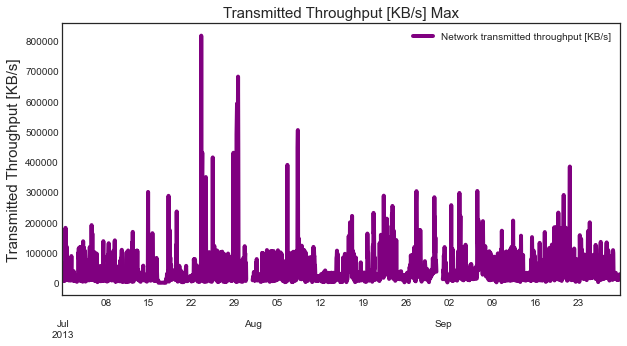

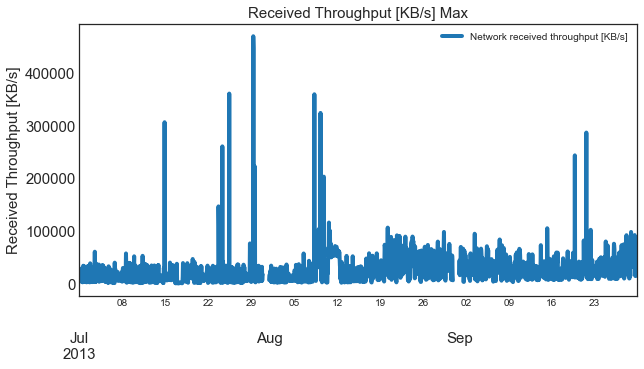

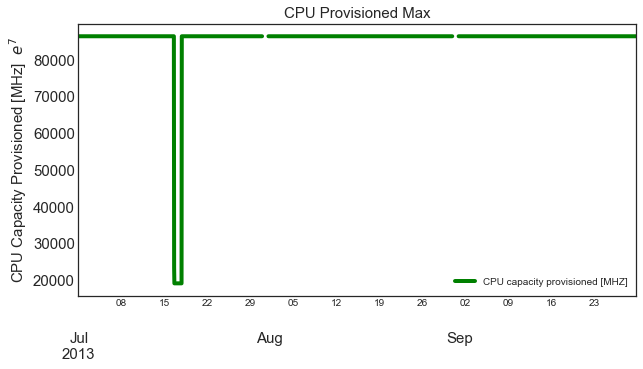

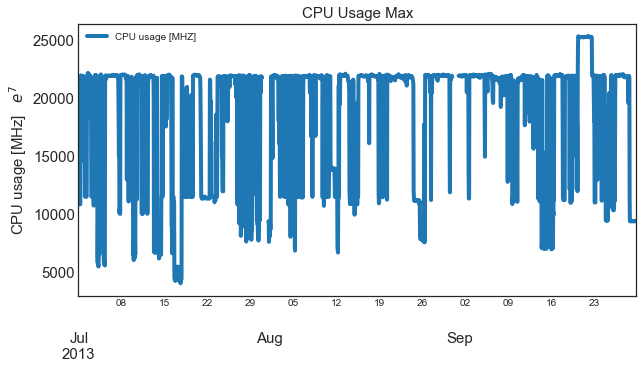

In [45]:
hourlytransmit.plot(color = "purple",linewidth = 4,  figsize=(10, 5))
plt.title('Transmitted Throughput [KB/s] Max',fontsize=15);
plt.ylabel('Transmitted Throughput [KB/s]', fontsize=15);
plt.xlabel('', fontsize=15);

hourlyreceive.plot( linewidth = 4, figsize=(10, 5))
plt.title('Received Throughput [KB/s] Max',fontsize=15);
plt.ylabel('Received Throughput [KB/s]', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

hourlyprovisioned.plot(color = "g", linewidth = 4, figsize=(10, 5))
plt.title('CPU Provisioned Max',fontsize=15);
plt.ylabel('CPU Capacity Provisioned [MHz]  $e^{7}$', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

hourlycpu.plot(linewidth = 4, figsize=(10, 5))
plt.title('CPU Usage Max',fontsize=15);
plt.ylabel('CPU usage [MHz]   $e^{7}$', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);

### Rolling Mean Visualization

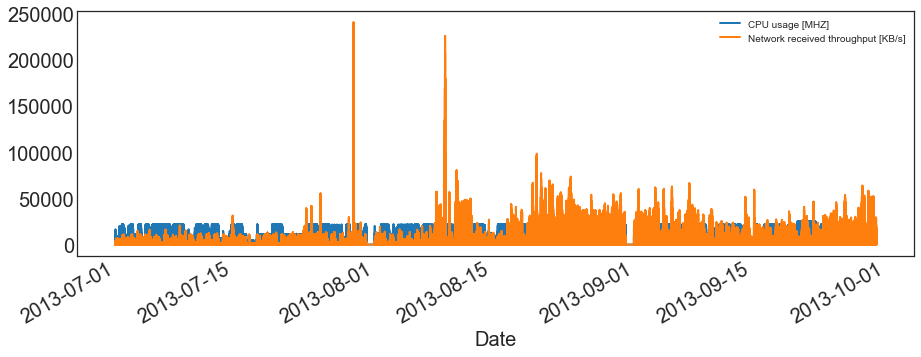

In [46]:
df_rm = pd.concat([cpu.rolling(12).mean(), receive.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(15,5), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20);

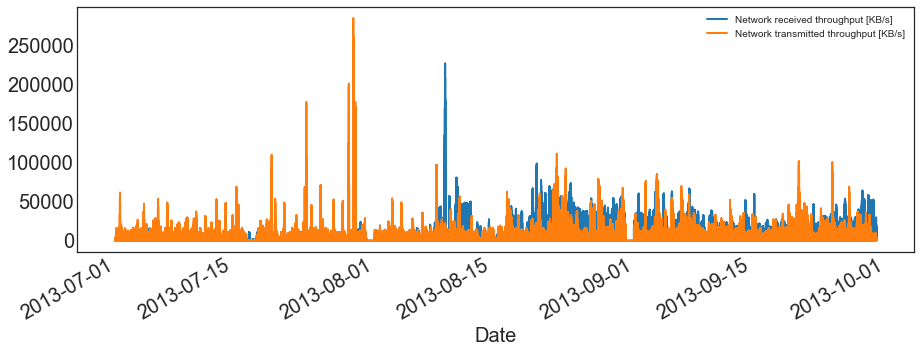

In [47]:
df_rm = pd.concat([receive.rolling(12).mean(), transmit.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(15,5), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20);

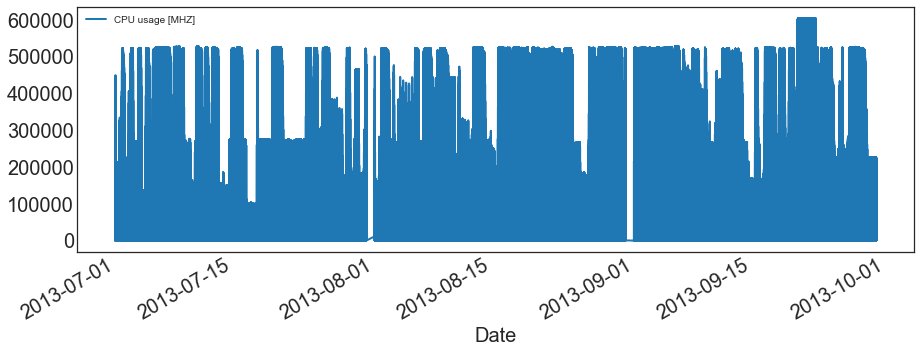

In [48]:
df_rm = pd.concat([cpu.rolling(24).sum()], axis=1)
df_rm.plot(figsize=(15,5), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20);


In [49]:
hourlydat = hourlydat[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]', 'Disk read throughput [KB/s]', 'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]','CPU usage prev', 'CPU_diff', 'received_prev', 'received_diff','transmitted_prev', 'transmitted_diff', 'weekday', 'weekend', 'month', 'day','CPU cores']]

hourlydatrest = hourlydat[hourlydat.columns[15:21]]


from scipy.stats import zscore

standardizeddf = hourlydat.iloc[1:]
standardizeddf = standardizeddf[standardizeddf.columns[0:15]].apply(zscore)

In [ ]:
concatenated_df['CPU usage [MHZ]']
plt.scatter(concatenated_df['CPU usage [MHZ]'], concatenated_df['Memory usage [KB]'])
plt.title("Correlation: CPU usage [MHZ] & Memory usage [KB]")
plt.show()


plt.scatter(hourlydat['CPU usage [MHZ]'], hourlydat['Memory usage [KB]'])
plt.title("Correlation: CPU usage [MHZ] & Memory usage [KB] \n resampled hourly")
plt.show()

In [ ]:

hourlydat = hourlydat[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]', 'Disk read throughput [KB/s]', 'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]','CPU usage prev', 'CPU_diff', 'received_prev', 'received_diff','transmitted_prev', 'transmitted_diff', 'weekday', 'weekend', 'month', 'day','CPU cores']]

In [ ]:
from scipy.stats import zscore
#remove first row with NA's from previous shift, that way we can get z scores
standardizeddf = hourlydat.iloc[1:]
standardizeddf = standardizeddf[standardizeddf.columns[0:15]].apply(zscore)

In [ ]:
standardizeddf.head()
standardizeddf.describe()

In [ ]:
df_rm2 = standardizeddf.iloc[:,0:7].rolling(12).mean()
df_rm2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);

### Hourly Data Visualization

In [ ]:
hourlycpu[60:120].plot(style=[':', '--', '-'])
plt.title('CPU hourly usage',fontsize=20);
plt.ylabel('CPU Usage Avg [MHZ]');


### Weekend, Weekday Visualization

In [ ]:
hourlydat = concatenated_df.resample('H').sum()
hourlydat['Date_Time'] = hourlydat.index
hourlydat['weekday'] = hourlydat['Date_Time'].dt.dayofweek
hourlydat['weekend'] = ((hourlydat.weekday) // 5 == 1).astype(float)

In [ ]:
hourlydat['month']=hourlydat['Date_Time'].dt.month 
hourlydat['day']=hourlydat['Date_Time'].dt.day
hourlydat.drop('Date_Time', axis=1, inplace=True)
hourlydat.drop('Timestamp [ms]', axis=1, inplace=True)


In [ ]:
plotdays = hourlydat.groupby('weekday').agg({'CPU usage [MHZ]': ['mean']})
plotdays = pd.DataFrame(plotdays)

In [ ]:
plotdays.plot(linewidth = 4, figsize=(7, 7),legend=None)
plt.title('CPU Usage Totals \n Across Days',fontsize=20);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.xlabel('', fontsize=15);
plt.xticks(np.arange(7), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), fontsize=15);
plt.yticks(fontsize=15);

In [ ]:
plt.figure(figsize=(7,7))
plt.title('CPU Usage Totals \n Across Days',fontsize=20);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('', fontsize=15);
sns.boxplot(y=hourlydat['CPU usage [MHZ]'],x = hourlydat.weekday,
            whis=np.inf, palette="vlag",linewidth=3)
plt.xticks(np.arange(7), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), fontsize=15);


In [ ]:
plt.figure(figsize=(7,7))
plt.title('CPU Usage Lower on Weekends',fontsize=20);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.yticks(fontsize=15);
sns.boxplot(y=hourlydat['CPU usage [MHZ]'],x = hourlydat.weekend,
            whis=np.inf, palette="vlag",linewidth=3)
plt.xticks(np.arange(2), ('Weekday', 'Weekend'), fontsize=15);
plt.xlabel('', fontsize=15);

### Correlation visualization

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(hourlydat.corr())

### Moving average - smoothening of data

In [ ]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
def moving_average(series, n):
   
    return np.average(series[-n:])

In [ ]:
from sklearn.metrics import classification_report

def classify(X_test,y_test):
    print(classification_report(X_test,y_test))

In [ ]:
## FUNCTION TO PLOT MOVING AVG


def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    rolling_mean = series.rolling(window=window).mean()

    plt.style.use('seaborn-white')
    plt.figure(figsize=(15,7))
    plt.title("Moving Average (window size = {})".format(window), fontsize = 20)
    plt.ylabel('Network transmitted throughput [KB/s]   $e^{7}$', fontsize=16);
    plt.xlabel('Time', fontsize=16);
    plt.yticks(fontsize=15);
    plt.xticks(fontsize=15);
    plt.plot(rolling_mean, "purple", label="Rolling Mean Trend",linewidth = 5)

    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper/Lower Bound", linewidth = 1)
        plt.plot(lower_bond, "r--", linewidth = 1)
        
        
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10, label = "Anomalies")
        
    plt.plot(series[window:], label="Actual CPU Usage", linewidth = 1)
    plt.legend(loc="upper right", fontsize =13)
    plt.grid(True)

In [ ]:
plotMovingAverage(hourlydat[['CPU usage [MHZ]']], 24, plot_intervals=True, plot_anomalies=True)

In [ ]:
plotMovingAverage(standardizeddf[['CPU usage [MHZ]']], 24, plot_intervals=True, plot_anomalies=True)

plotMovingAverage(standardizeddf[['Network received throughput [KB/s]']], 24, plot_intervals=True, plot_anomalies=True)

plotMovingAverage(standardizeddf[['Network transmitted throughput [KB/s]']], 24, plot_intervals=True, plot_anomalies=True)

### ADF Test - Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(hourlydat['CPU usage [MHZ]'], autolag='AIC')

# formats stats output
def adf_output(dftest):
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])

    # the last element is a dictionary to unpack
    for key,value in dftest[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
adf_output(dftest)

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        plt.style.use('seaborn-white')
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: '+ str(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [ ]:
tsplot(hourlydat['CPU usage [MHZ]'], lags=60)
ads_diff = hourlydat['CPU usage [MHZ]'] - hourlydat['CPU usage [MHZ]'].shift(24)
tsplot(ads_diff[24:], lags=60)
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)


### This indicates short time series

In [ ]:
plt.figure(figsize=(10,5))
autocorrelation_plot(hourlydat['CPU usage [MHZ]']);
plt.show();


## MODULE 3 : MODELING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import explained_variance_score
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### Time Series Split

In [75]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    
 
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
   
    tscv = TimeSeriesSplit(n_splits=3) 
    
    
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [ ]:
 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_size):
    
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [77]:
def plotCoefficients(model):
   
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.style.use('seaborn-white')
    plt.figure(figsize=(15, 7))
    plt.tick_params(labelsize=20)
    plt.xlabel("Features", fontsize = 20) 
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [78]:
data = pd.DataFrame(hourlydat['CPU usage [MHZ]'].copy())
data.columns = ["y"]


for i in range(3, 25):
    data["lag_{}".format(i)] = data.y.shift(i)

y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

### Plotting the model

In [81]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    prediction = model.predict(X_test)
  

    plt.style.use('seaborn-white')
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "orange", label="Prediction", linewidth=2.0)
    plt.plot(y_test,label="Actual Usage", linewidth=2.0)
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="Upper/Lower Bounds", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        plt.tick_params(labelsize=20)
        plt.ylabel("CPU usage [MHZ]", fontsize = 20)
        plt.xlabel("Time", fontsize = 20) 
        plt.yticks([2000000,6000000,12000000, 50000000])# customized for graph readability
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    mape = mean_absolute_percentage_error(y_test, prediction)
    error = mean_absolute_error(y_test,prediction)
    classifi = r2_score(y_test, prediction,multioutput='variance_weighted')
    mse =  mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    
    var = explained_variance_score(y_test, prediction)
#    msle = mean_squared_log_error(y_test, prediction)
    print("Mean squared Error: "+ str(mse))
    print("Root mean squared error is: "+ str(rmse))
    print("Mean absolute percentage Error:{0:.2f}%".format(mape))
 #   print("Mean squared log error: {0:.2f}".format(msle))
    print("Explained variance score: {0:.2f}".format(var))     
    print("r2 score is {0:.2f}".format(classifi))
    print("Mean Absolute Error: {0:.2f}".format(error))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(mape),  fontsize = 20)
    plt.legend(loc="best", fontsize = 15)
    plt.tight_layout()
    plt.grid(True);

### Linear Regression

Mean squared Error: 3562806297452.2114
Root mean squared error is: 1887539.7472509583
Mean absolute percentage Error:38.40%
Explained variance score: 0.48
r2 score is 0.48
Mean Absolute Error: 1431158.67


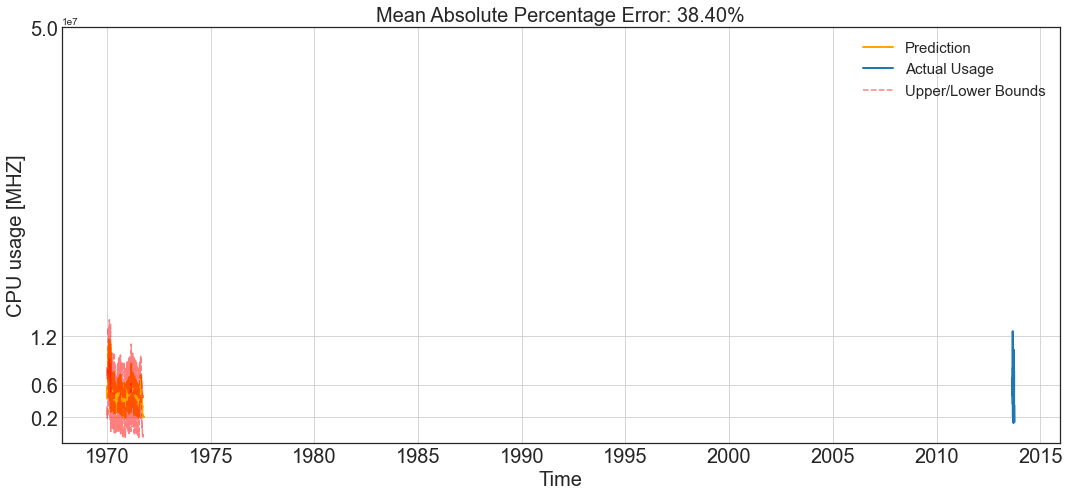

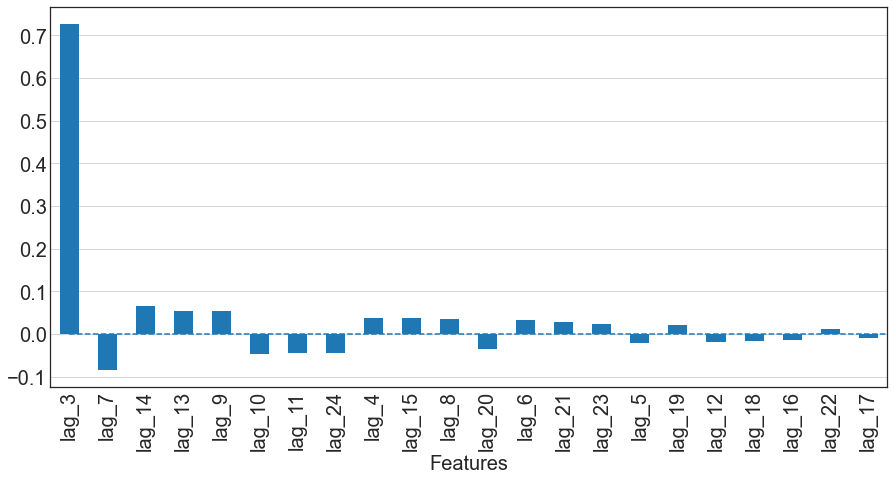

In [82]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)


model = LinearRegression()
model.fit(X_train, y_train)

plotModelResults(model, plot_intervals=True)
plotCoefficients(model)


In [83]:
print(y_test)

Timestamp
2013-09-02 22:00:00    4.782257e+06
2013-09-02 23:00:00    4.882035e+06
2013-09-03 00:00:00    4.995858e+06
2013-09-03 01:00:00    4.941507e+06
2013-09-03 02:00:00    4.911416e+06
                           ...     
2013-09-29 17:00:00    1.420654e+06
2013-09-29 18:00:00    1.428400e+06
2013-09-29 19:00:00    1.429791e+06
2013-09-29 20:00:00    1.428487e+06
2013-09-29 21:00:00    1.422804e+06
Freq: H, Name: y, Length: 648, dtype: float64


In [84]:
data["hour"] = data.index.hour
data["weekday"] = data.index.weekday
data['is_weekend'] = data.weekday.isin([5,6])*1

In [85]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def plotModelResultsScaler(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    prediction = model.predict(X_test)

    plt.style.use('seaborn-white')
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "orange", label="Prediction", linewidth=4.0)
    plt.plot(y_test.values,label="Actual Usage", linewidth=2.0)
    
   
    
    plt.ylabel("CPU usage [MHZ]", fontsize = 20)
    plt.xlabel("Time", fontsize = 20) 
   
    plt.tick_params(labelsize=20)
    plt.ylabel('CPU [MHz]  $e^{7}$', fontsize=20);
    plt.xlabel("Time", fontsize = 20) 
   
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "b--", label="Upper/Lower Bounds", alpha=0.5, linewidth=1)
        plt.plot(upper, "b--", alpha=0.5, linewidth=1)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    
    error = mean_absolute_error(y_test,prediction)
    classifi = r2_score(y_test, prediction,multioutput='variance_weighted')
    mse =  mean_squared_error(y_test, prediction)
    rmse = mean_squared_error(y_test, prediction, squared=False)
    mape = mean_absolute_percentage_error(prediction,y_test)
    var = explained_variance_score(y_test, prediction)
    msle = mean_squared_log_error(y_test, prediction)
    print("Mean squared Error: "+ str(mse))
    print("Root mean squared error is: "+ str(rmse))
    print("Mean absolute percentage Error: {0:.2f}%".format(mape))
    print("Mean squared log error: {0:.2f}".format(msle))
    print("Explained variance score: {0:.2f}".format(var))     
    print("r2 score is {0:.2f}".format(classifi))
    print("Mean Absolute Error: {0:.2f}".format(error))
    plt.title("Lasso Regression \n Mean Absolute Error {0:.2f}%".format(mape), fontsize = 20)
    plt.legend(loc="best", fontsize =15)
    plt.tight_layout()
    plt.grid(True);

### Scaled Linear Regression

Mean squared Error: 3442067640312.3003
Root mean squared error is: 1855281.0138392244
Mean absolute percentage Error: 32.20%
Mean squared log error: 0.17
Explained variance score: 0.50
r2 score is 0.50
Mean Absolute Error: 1374504.54


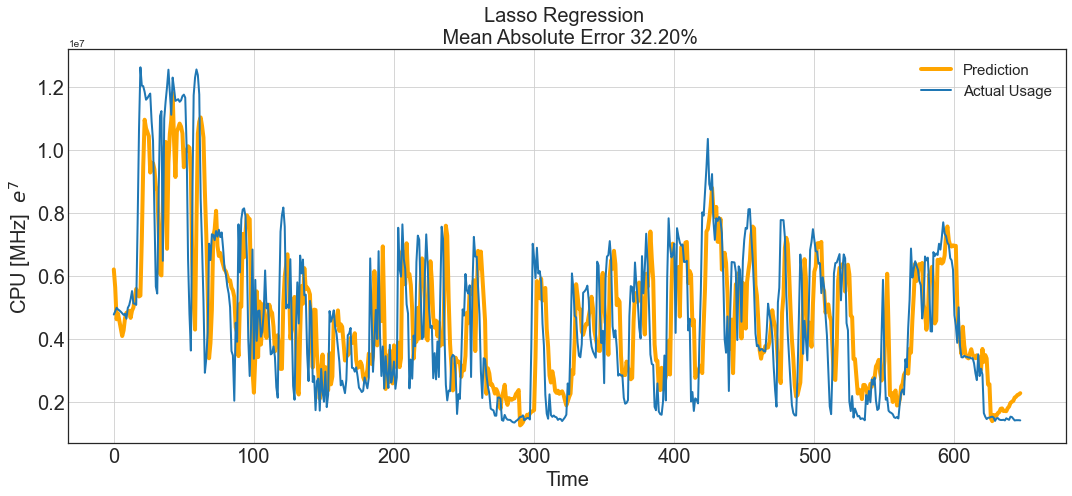

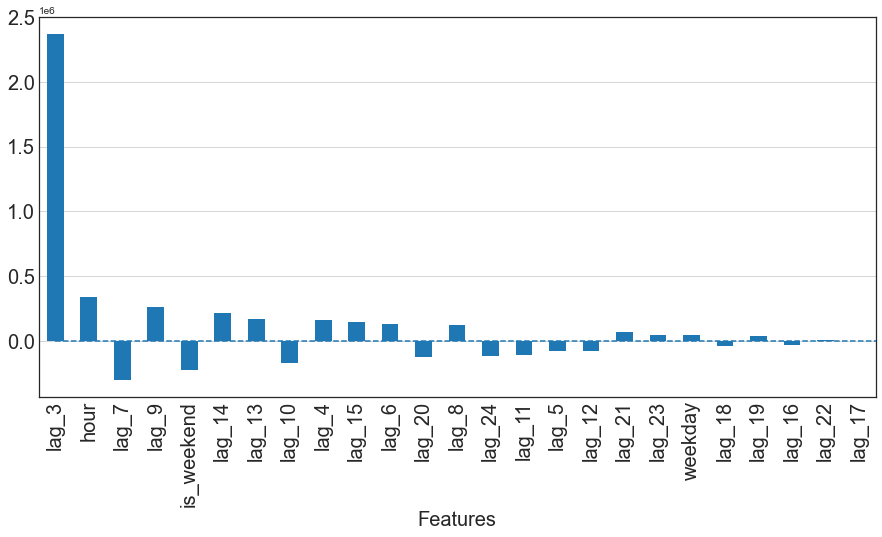

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = data.dropna().y
X = data.dropna().drop(['y'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)

plotModelResultsScaler(lr2, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=False, plot_anomalies=False)
plotCoefficients(lr2)

In [87]:
def code_mean(data, cat_feature, real_feature):
    
    return dict(data.groupby(cat_feature)[real_feature].mean())

def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):
   
  
    data = pd.DataFrame(series.copy())
    data.columns = ["y"]
    
    
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)
    
    
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    
    data['network received'] = hourlydat[['Network received throughput [KB/s]']]
    data['network transmitted'] = hourlydat[['Network transmitted throughput [KB/s]']]
    data['cpu diff'] = hourlydat[['CPU_diff']]
    data['received_prev'] = hourlydat[['received_prev']]
    data['core'] = hourlydat[['CPU cores']]

    if target_encoding:
        
        test_index = int(len(data.dropna())*(1-test_size))
        data['weekday_average'] = list(map(
            code_mean(data[:test_index], 'weekday', "y").get, data.weekday))
        data["hour_average"] = list(map(
            code_mean(data[:test_index], 'hour', "y").get, data.hour))
        
        
        data.drop(["hour", "weekday"], axis=1, inplace=True)
    
   
    y = data.dropna().y
    X = data.dropna().drop(['y'], axis=1)
    X_train, X_test, y_train, y_test =\
    timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

Mean squared Error: 3304032505512.4697
Root mean squared error is: 1817699.7842087317
Mean absolute percentage Error: 31.48%
Mean squared log error: 0.18
Explained variance score: 0.52
r2 score is 0.51
Mean Absolute Error: 1388462.20


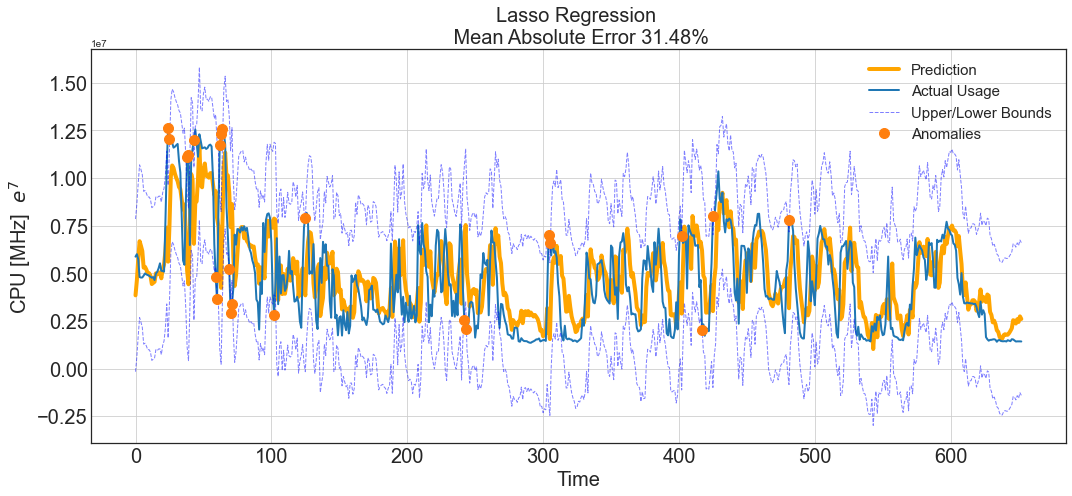

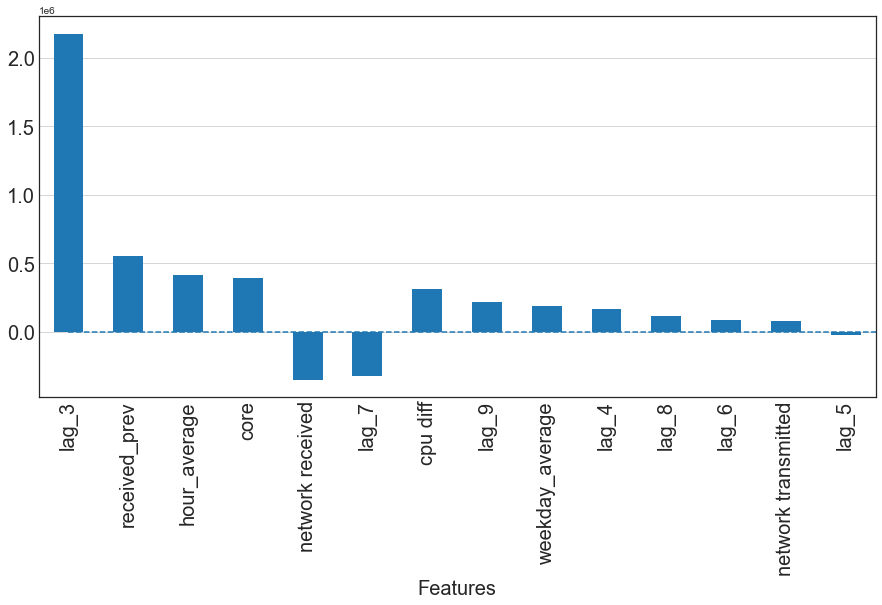

In [88]:
X_train, X_test, y_train, y_test =\
prepareData(hourlydat[['CPU usage [MHZ]']], lag_start=3, lag_end=10, test_size=0.3, target_encoding=True)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResultsScaler(lr, X_train=X_train_scaled, X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lr)

### Ridge Regression

In [89]:
X_train, X_test, y_train, y_test =\
prepareData(hourlydat['CPU usage [MHZ]'], lag_start=3, lag_end=25, test_size=0.3, target_encoding=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

       feature        VIF
0        lag_3  20.491391
1        lag_4  39.069874
2        lag_5  39.095046
3        lag_6  39.220654
4        lag_7  39.511744
5        lag_8  39.617895
6        lag_9  39.678032
7       lag_10  39.596390
8       lag_11  39.579634
9       lag_12  39.525431
10      lag_13  39.597484
11      lag_14  39.587604
12      lag_15  39.508672
13      lag_16  39.503234
14      lag_17  39.563656
15      lag_18  39.542140
16      lag_19  39.575441
17      lag_20  39.433208
18      lag_21  39.164599
19      lag_22  39.049988
20      lag_23  39.003911
21      lag_24  20.171771
22        hour   3.070158
23     weekday   7.172682
24  is_weekend   3.714826


Mean squared Error: 3198033472062.875
Root mean squared error is: 1788304.6362582843
Mean absolute percentage Error: 30.61%
Mean squared log error: 0.17
Explained variance score: 0.54
r2 score is 0.53
Mean Absolute Error: 1367014.70


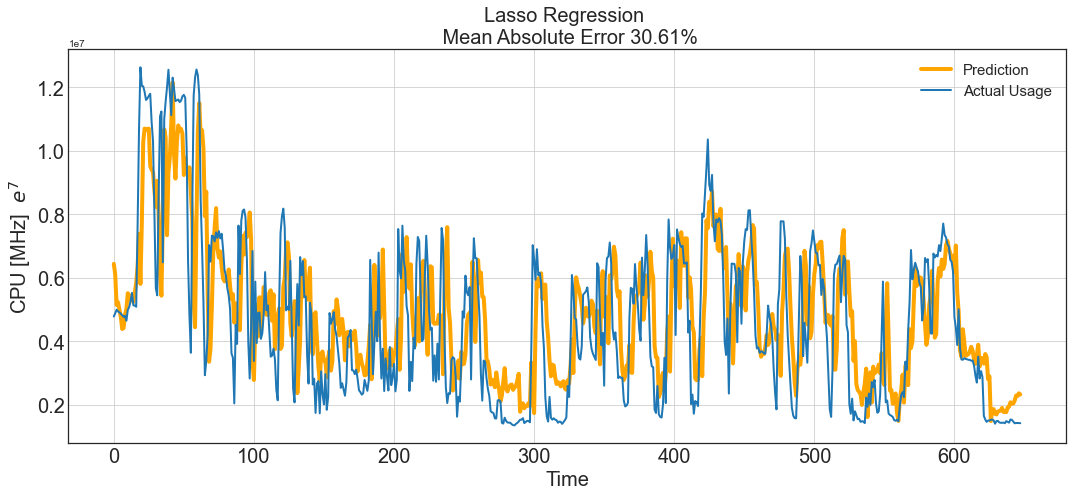

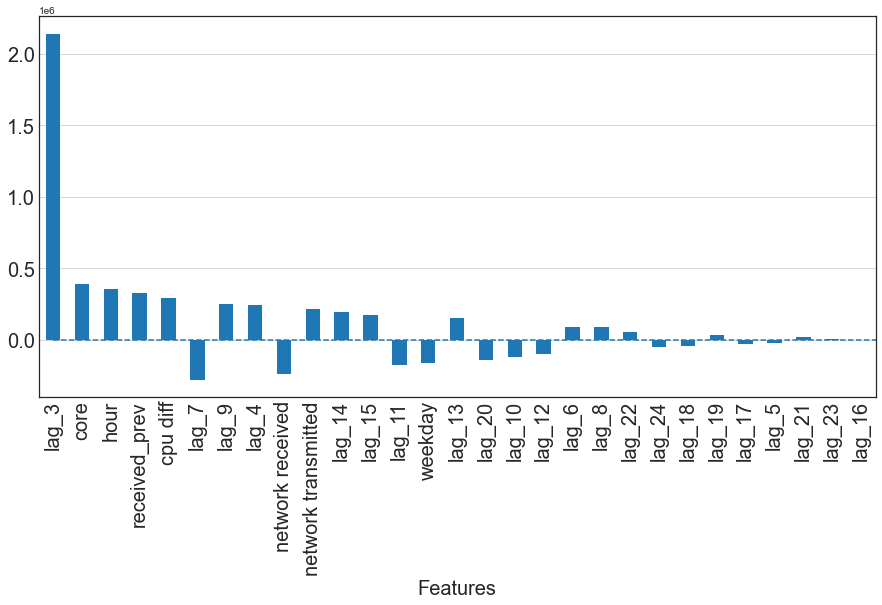

In [91]:
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResultsScaler(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=False, plot_anomalies=False)
plt.savefig('scaled_ridge_regression.png')

plotCoefficients(ridge)

### Lasso Regression

Mean squared Error: 3152490935565.777
Root mean squared error is: 1775525.537852322
Mean absolute percentage Error: 30.99%
Mean squared log error: 0.17
Explained variance score: 0.54
r2 score is 0.54
Mean Absolute Error: 1374554.10


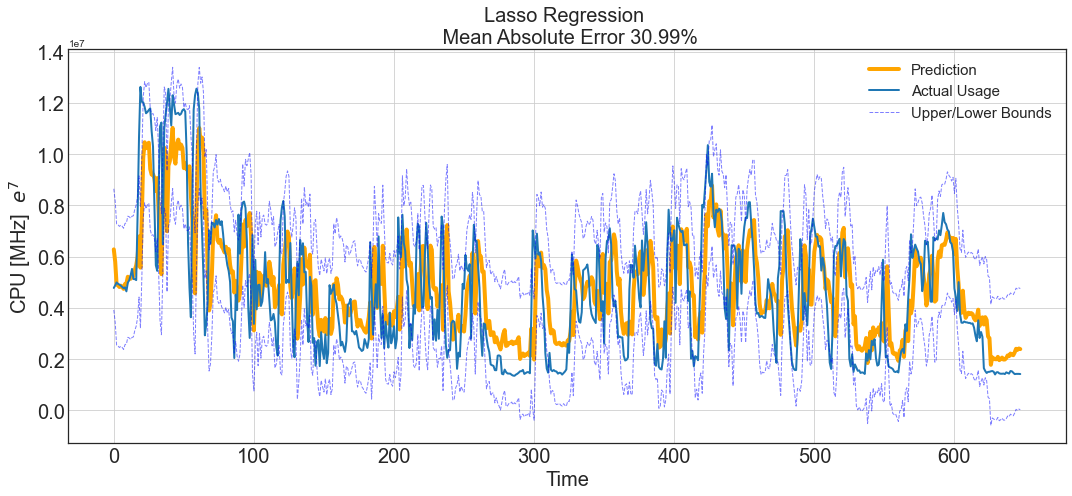

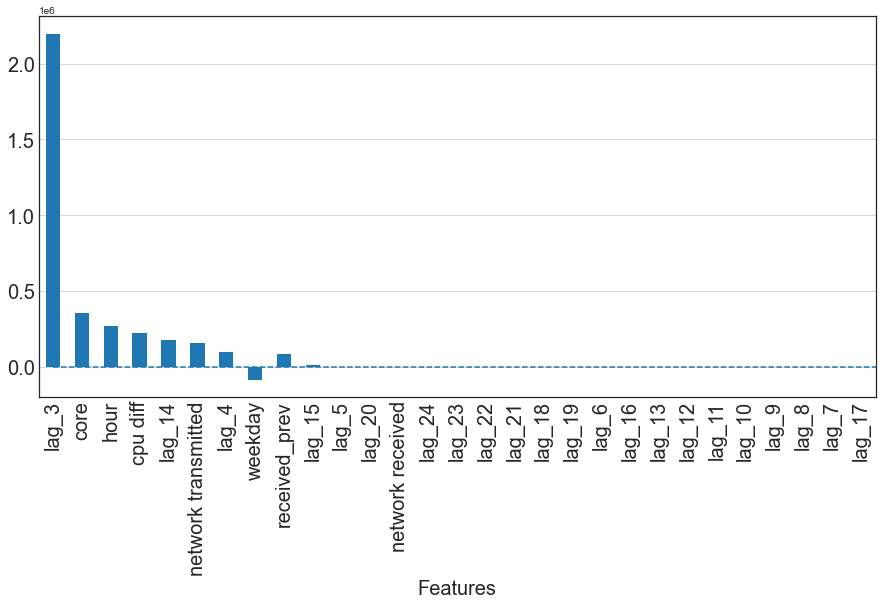

In [92]:
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResultsScaler(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=False)
plt.savefig('scaled_lasso_regression.png')
plotCoefficients(lasso)

### Differencing CPU usage

<Figure size 1080x360 with 0 Axes>

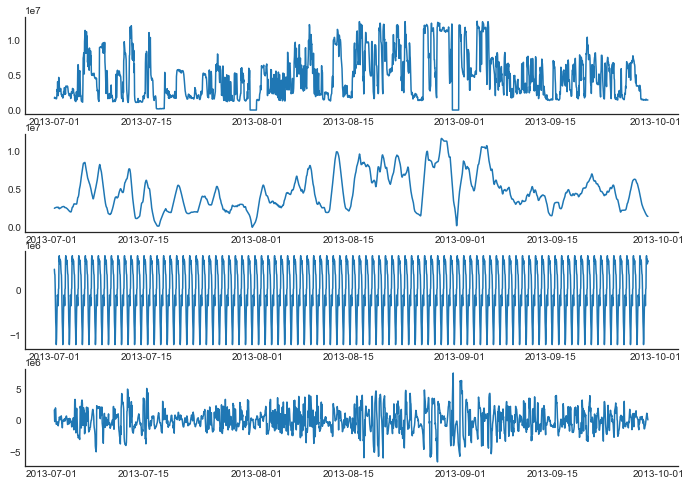

In [93]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



decomp = seasonal_decompose(hourlydat['CPU usage [MHZ]'], model="additive")

plt.figure(figsize=(15,5))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(11.7, 8.27)

ax1.plot(hourlydat['CPU usage [MHZ]'])
ax2.plot(decomp.trend)
ax3.plot(decomp.seasonal)
ax4.plot(decomp.resid)
sns.despine()

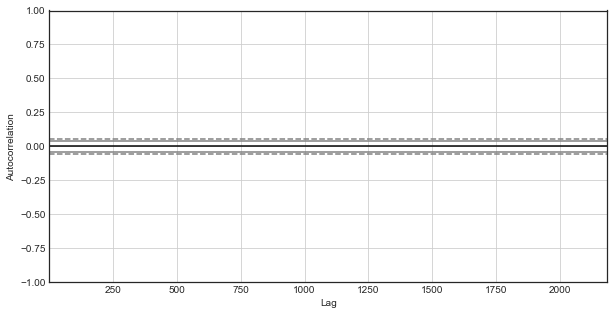

In [94]:
plt.figure(figsize=(10,5))
autocorrelation_plot(decomp.resid);
plt.show();

In [95]:
dftest = adfuller(hourlydat['CPU usage [MHZ]'], autolag='AIC')

# formats stats output
def adf_output(dftest):
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags Used','Number of Observations Used'])

    # the last element is a dictionary to unpack
    for key,value in dftest[4].items(): 
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
adf_output(dftest)

Test Statistic                -6.633146e+00
p-value                        5.648578e-09
# of Lags Used                 1.200000e+01
Number of Observations Used    2.171000e+03
Critical Value (1%)           -3.433366e+00
Critical Value (5%)           -2.862872e+00
Critical Value (10%)          -2.567479e+00
dtype: float64


In [96]:
resid = decomp.resid.dropna()
decomp_adf = adfuller(resid, autolag='AIC')
adf_output(decomp_adf)

Test Statistic                -1.305650e+01
p-value                        2.089546e-24
# of Lags Used                 2.600000e+01
Number of Observations Used    2.133000e+03
Critical Value (1%)           -3.433419e+00
Critical Value (5%)           -2.862896e+00
Critical Value (10%)          -2.567492e+00
dtype: float64


Test Statistic                -1.779734e+01
p-value                        3.228679e-30
# of Lags Used                 1.200000e+01
Number of Observations Used    2.170000e+03
Critical Value (1%)           -3.433367e+00
Critical Value (5%)           -2.862873e+00
Critical Value (10%)          -2.567480e+00
dtype: float64


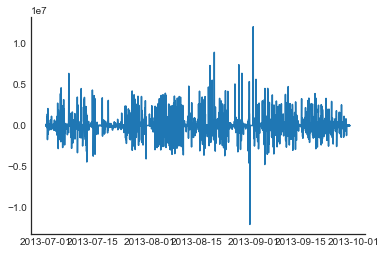

In [97]:
diffed = hourlydat['CPU usage [MHZ]'] - hourlydat['CPU usage [MHZ]'].shift()
diffed.dropna(inplace=True)
plt.plot(diffed)
sns.despine()
diffed_adf = adfuller(diffed, autolag='AIC')
adf_output(diffed_adf)

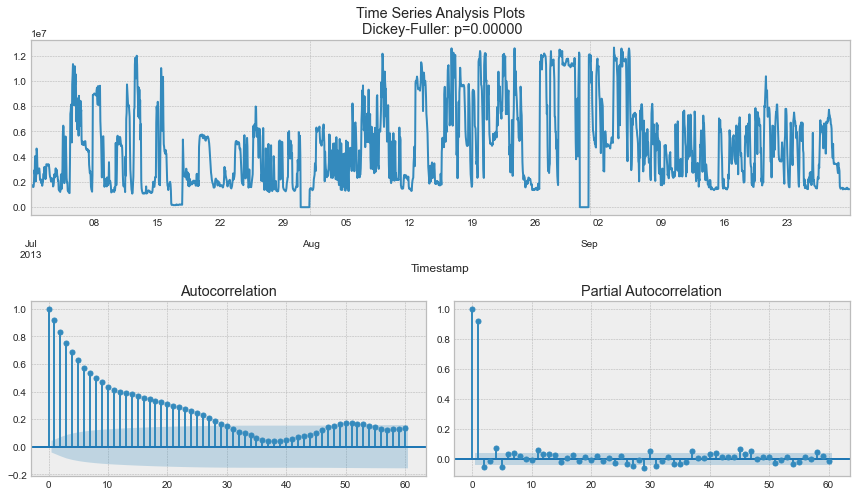

In [98]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(hourlydat['CPU usage [MHZ]'], lags=60)

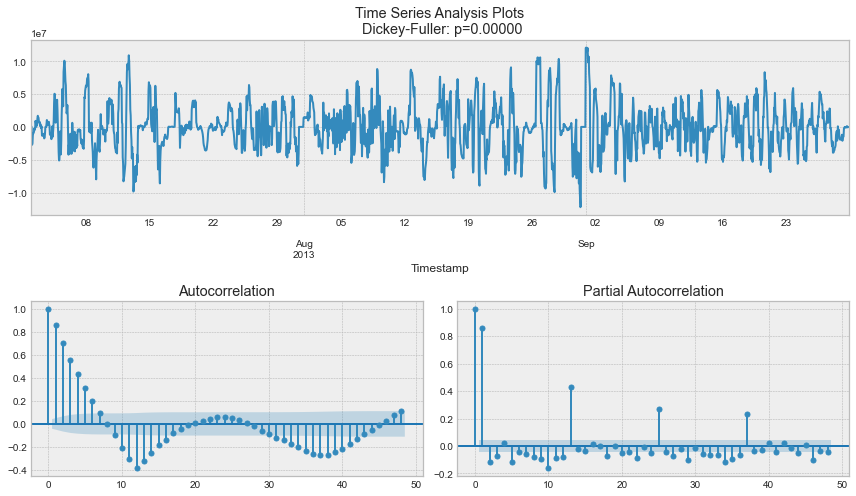

In [99]:
standardizeddf_diff = hourlydat['CPU usage [MHZ]'] - hourlydat['CPU usage [MHZ]'].shift(12)
tsplot(standardizeddf_diff[24:], lags=48)


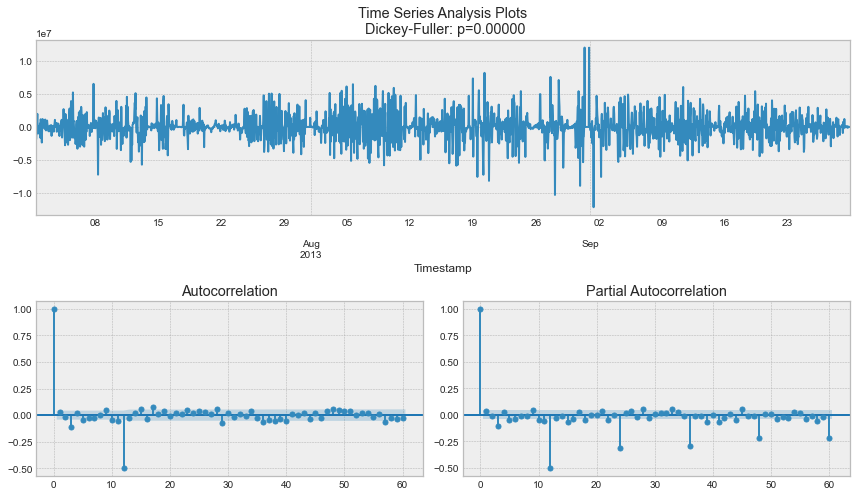

In [100]:
standardizeddf_diff = standardizeddf_diff - standardizeddf_diff.shift(1)
tsplot(standardizeddf_diff[12+1:], lags=60)

### ARIMA model

                             ARIMA Model Results                              
Dep. Variable:      D.CPU usage [MHZ]   No. Observations:                 2183
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -33813.757
Method:                       css-mle   S.D. of innovations        1290613.118
Date:                Thu, 27 May 2021   AIC                          67641.514
Time:                        20:09:27   BIC                          67681.333
Sample:                    06-30-2013   HQIC                         67656.070
                         - 09-29-2013                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -116.4533   2.28e+04     -0.005      0.996   -4.49e+04    4.47e+04
ar.L1.D.CPU usage [MHZ]     0.0061      0.021      0.284      0.777      -0.036       0.048


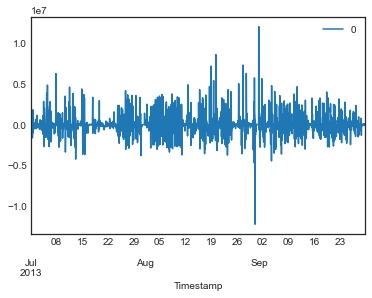

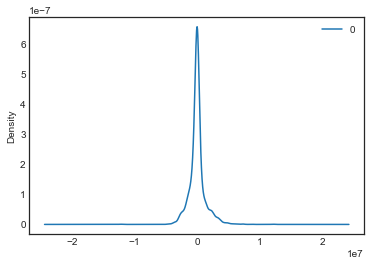

                  0
count  2.183000e+03
mean   2.226194e+00
std    1.290909e+06
min   -1.221675e+07
25%   -4.599275e+05
50%   -2.813391e+04
75%    2.954905e+05
max    1.203131e+07


In [101]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# fit model
model = ARIMA(hourlydat['CPU usage [MHZ]'], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [102]:
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
 

X = hourlydat['CPU usage [MHZ]']

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(10,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))



predicted=10652188.118512, expected=11261643.345706
predicted=10800526.726774, expected=11381045.051983
predicted=10844082.729588, expected=11390715.285864
predicted=10897352.017492, expected=11346973.540412
predicted=10860495.778035, expected=11308707.473535
predicted=10828003.344845, expected=11153352.438497
predicted=10674327.970781, expected=11280557.275951
predicted=10798776.509323, expected=11205609.137671
predicted=10748363.130778, expected=11282032.551171
predicted=10787595.308608, expected=11806658.249199
predicted=11368447.001770, expected=10933420.947364
predicted=10419596.118206, expected=7824636.985105
predicted=7391704.383236, expected=5188952.594241
predicted=5191037.632179, expected=3794323.333617
predicted=3982528.771337, expected=4601432.805871
predicted=4588732.413157, expected=4146867.118181
predicted=4163622.935611, expected=5670651.793365
predicted=5653935.277856, expected=8613757.579402
predicted=8858241.741921, expected=4027708.079376
predicted=3530028.585859, e

In [103]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error = mean_absolute_error(test,predictions)
classifi = r2_score(test, predictions,multioutput='variance_weighted')
mse =  mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions, squared=False)

test = test.values.reshape(-1, 1)
mape = mean_absolute_percentage_error(predictions,test)
var = explained_variance_score(test, predictions)
#msle = mean_squared_log_error(test, predictions)
print("Mean squared Error: "+ str(mse))
print("Root mean squared error is: "+ str(rmse))
print("Mean absolute percentage Error: {0:.2f}%".format(mape))
#print("Mean squared log error: {0:.2f}".format(msle))
print("Explained variance score: {0:.2f}".format(var))     
print("r2 score is {0:.2f}".format(classifi))
print("Mean Absolute Error: {0:.2f}".format(error))


Mean squared Error: 1773363992082.7285
Root mean squared error is: 1331677.1350754388
Mean absolute percentage Error: 27.05%
Explained variance score: 0.80
r2 score is 0.80
Mean Absolute Error: 845383.25


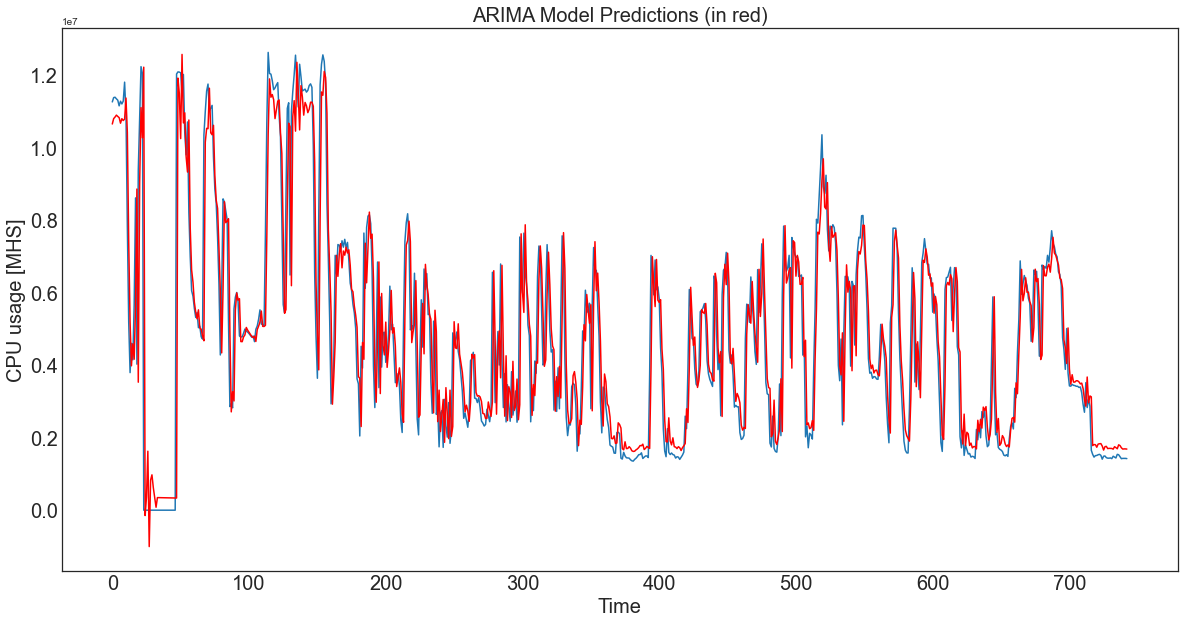

In [104]:
testnew = test
#testnew= testnew.reset_index(drop = True)
prednew = pd.Series( (v[0] for v in predictions) )
plt.figure(figsize=(20,10))
plt.plot(testnew)
plt.plot(prednew, color='red')
plt.tick_params(labelsize=20)
plt.title("ARIMA Model Predictions (in red)", fontsize = 20)
plt.ylabel("CPU usage [MHS]", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.show();

### HOLT WINTERS MODEL

In [112]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:
# Standardize time series data
from pandas import Series
from sklearn.preprocessing import StandardScaler
from math import sqrt
# load the dataset and print the first 5 rows
# prepare data for standardization
values = hourlydat['CPU usage [MHZ]']
values = values.values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
# inverse transform and print the first 5 rows
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

Mean: 4699483.242110, StandardDeviation: 3177434.649794
[-0.95122698]
[-0.90700962]
[-0.93772111]
[-0.95979441]
[-0.93393586]
[1677021.660339]
[1817519.45998964]
[1719935.68365985]
[1649799.21903881]
[1731963.07391202]


In [115]:

class HoltWinters:
    
   
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor
        
        
    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                self.Smooth.append(smooth)
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
                
                self.PredictedDeviation.append(0)
                
                self.UpperBond.append(self.result[0] + 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                
                self.LowerBond.append(self.result[0] - 
                                      self.scaling_factor * 
                                      self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                     
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [116]:
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [121]:
data = hourlydat['CPU usage [MHZ]'][:-20] # leave some data for testing

# initializing model parameters alpha, beta and gamma
x = [0, 1, 1] 

# Minimizing the loss function 
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )

# get optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)

# train model
model = HoltWinters(data, slen = 24, 
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final, 
                    n_preds = 60,scaling_factor = 4)
model.triple_exponential_smoothing()

0.0 1.0 0.774094330480016


Mean squared Error: 683884721750.1296
Root mean squared error is: 826973.2291617
Mean absolute percentage Error: 16.67%
Mean squared log error: 4.35
Explained variance score: 0.91
r2 score is 0.91
Mean Absolute Error: 623613.75


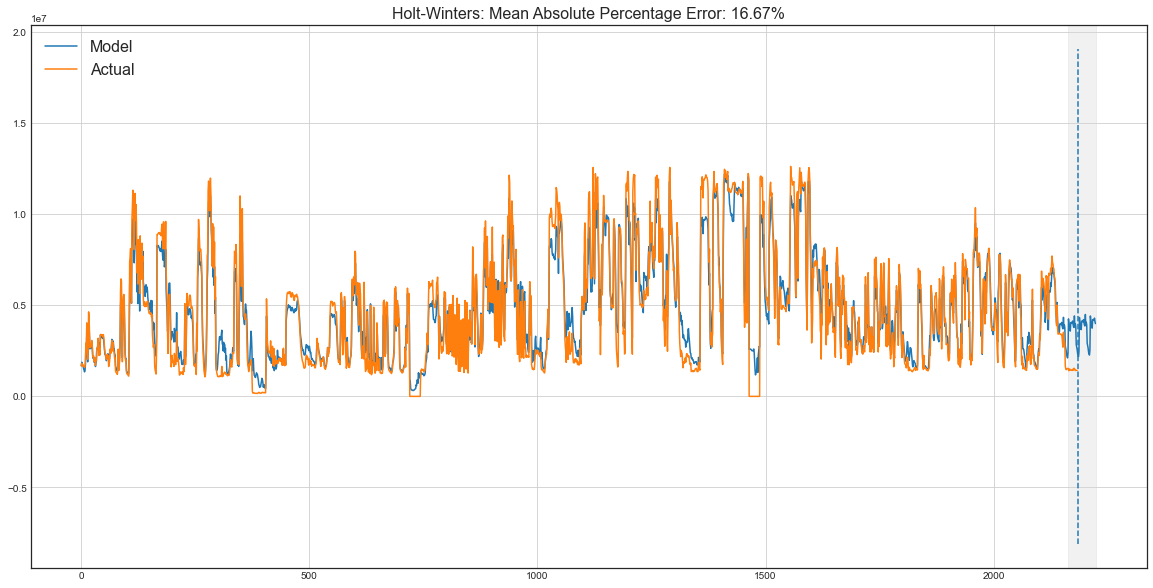

In [122]:
def plotHoltWinters(series, plot_intervals=False, plot_anomalies=False):
    
    
    plt.figure(figsize=(20, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(series.values, label = "Actual")
    error = mean_absolute_error(series.values, model.result[:len(series)])
    classifi = r2_score(model.result[:len(series)], series.values,multioutput='variance_weighted')
    mse =  mean_squared_error(model.result[:len(series)], series.values)
    rmse = mean_squared_error(model.result[:len(series)], series.values, squared=False)
    mape = mean_absolute_percentage_error(model.result[:len(series)], series.values)
    var = explained_variance_score(model.result[:len(series)], series.values)
    msle = mean_squared_log_error(model.result[:len(series)], series.values)
    print("Mean squared Error: "+ str(mse))
    print("Root mean squared error is: "+ str(rmse))
    print("Mean absolute percentage Error: {0:.2f}%".format(mape))
    print("Mean squared log error: {0:.2f}".format(msle))
    print("Explained variance score: {0:.2f}".format(var))     
    print("r2 score is {0:.2f}".format(classifi))
    print("Mean Absolute Error: {0:.2f}".format(error))
    plt.title("Holt-Winters: Mean Absolute Percentage Error: {0:.2f}%".format(mape), fontsize = 16)
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=16);
    
plotHoltWinters(hourlydat['CPU usage [MHZ]'])
#plotHoltWinters(hourlydat['CPU usage [MHZ]'], plot_intervals=True, plot_anomalies=True)

### SARIMA MODEL

In [112]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        

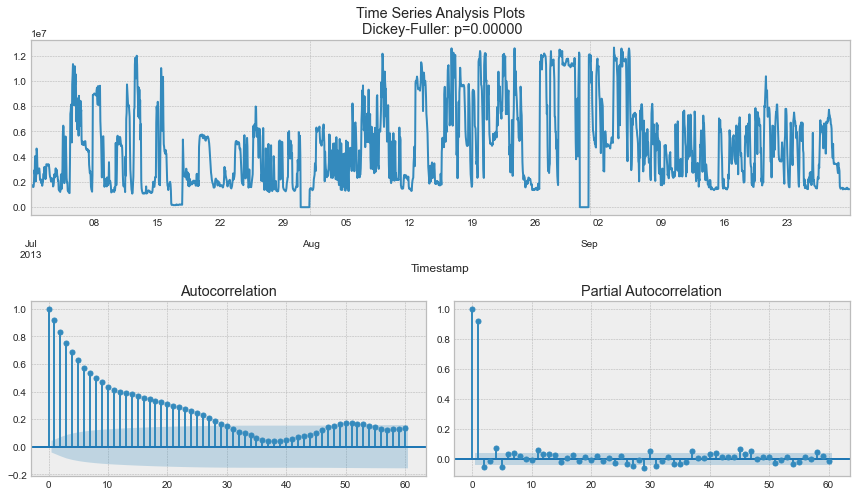

In [113]:
tsplot(hourlydat['CPU usage [MHZ]'], lags=60)

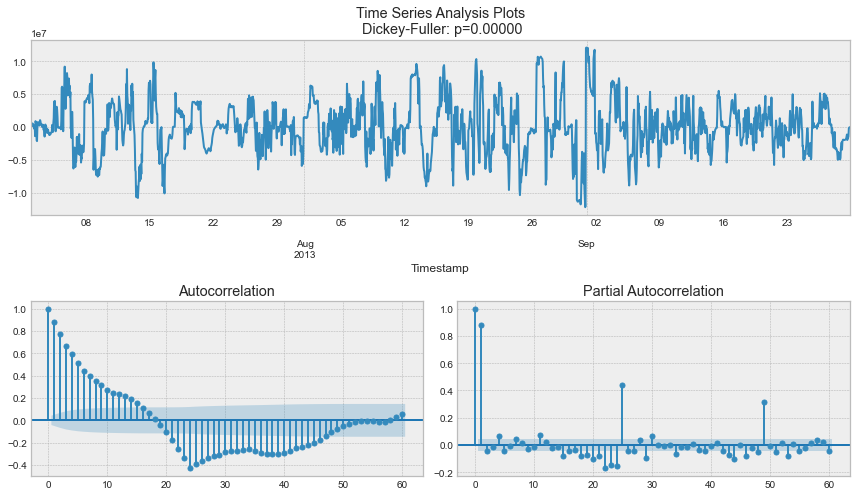

In [114]:
ads_diff = hourlydat['CPU usage [MHZ]'] - hourlydat['CPU usage [MHZ]'].shift(24)
tsplot(ads_diff[24:], lags=60)

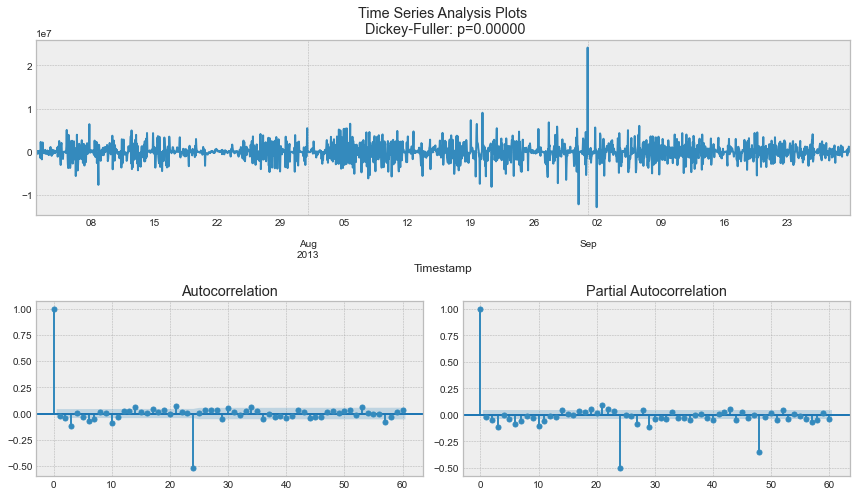

In [115]:
ads_diff = ads_diff - ads_diff.shift(1)
tsplot(ads_diff[24+1:], lags=60)

In [116]:
# setting initial values and some bounds for them based on ACF and PACF
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(0, 3)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)


In [117]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(hourlydat['CPU usage [MHZ]'], order=(param[0], d, param[1]), 
                                            seasonal_order=(param[3], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    

result_table = optimizeSARIMA(parameters_list, d, D, s)


  0%|          | 0/54 [00:00<?, ?it/s]

In [118]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(hourlydat['CPU usage [MHZ]'], order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      CPU usage [MHZ]   No. Observations:                 2184
Model:             SARIMAX(4, 1, 4)x(2, 1, [1], 24)   Log Likelihood              -33664.601
Date:                              Thu, 27 May 2021   AIC                          67353.202
Time:                                      20:56:30   BIC                          67421.330
Sample:                                  06-30-2013   HQIC                         67378.120
                                       - 09-29-2013                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0226      0.564      0.040      0.968      -1.083       1.128
ar.L2          0.22

In [119]:
import itertools

In [120]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 6)
 
# generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))
 
# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [121]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y_train,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(0, 1, 0)x(2, 2, 2, 12)12 model - AIC:46599.085431637955


In [122]:
# define SARIMAX model and fit it to the data
mdl = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 1, 0),
                                seasonal_order=(2, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True)
#res = mdl.fit()
#The summary- look at table of coefficients.
res = mdl.fit()

print(res.summary().tables[1])

# print statistics
print(res.aic)
print(res.summary())


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6372      0.026    -24.434      0.000      -0.688      -0.586
ar.S.L24      -0.3069      0.035     -8.807      0.000      -0.375      -0.239
ma.S.L12      -0.9888      0.032    -31.076      0.000      -1.051      -0.926
sigma2      4.573e+12   7.44e-15   6.15e+26      0.000    4.57e+12    4.57e+12
47005.69882781833
                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1512
Model:             SARIMAX(0, 1, 0)x(2, 2, [1], 12)   Log Likelihood              -23498.849
Date:                              Thu, 27 May 2021   AIC                          47005.699
Time:                                      22:12:25   BIC                          47026.917
Sample:                                  07

In [123]:
# fit model to data
res = sm.tsa.statespace.SARIMAX(y_train,
                                order=(0, 1, 0),
                                seasonal_order=(2,2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()

print(res.summary().tables[1])
 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6372      0.026    -24.434      0.000      -0.688      -0.586
ar.S.L24      -0.3069      0.035     -8.807      0.000      -0.375      -0.239
ma.S.L12      -0.9888      0.032    -31.076      0.000      -1.051      -0.926
sigma2      4.573e+12   7.44e-15   6.15e+26      0.000    4.57e+12    4.57e+12


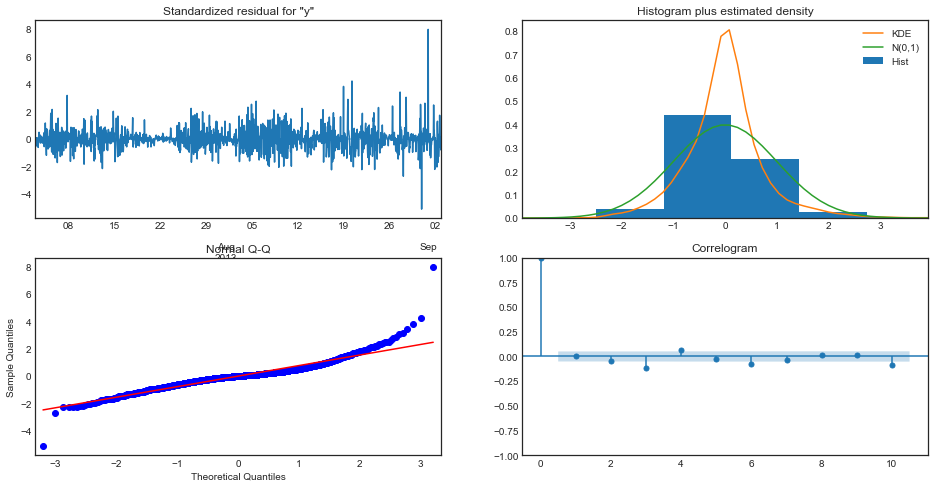

In [124]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

In [125]:

res = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(2, 2, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=True).fit()


res = mdl.fit()

print(res.summary().tables[1]) 



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6372      0.026    -24.434      0.000      -0.688      -0.586
ar.S.L24      -0.3069      0.035     -8.807      0.000      -0.375      -0.239
ma.S.L12      -0.9888      0.032    -31.076      0.000      -1.051      -0.926
sigma2      4.573e+12   7.44e-15   6.15e+26      0.000    4.57e+12    4.57e+12


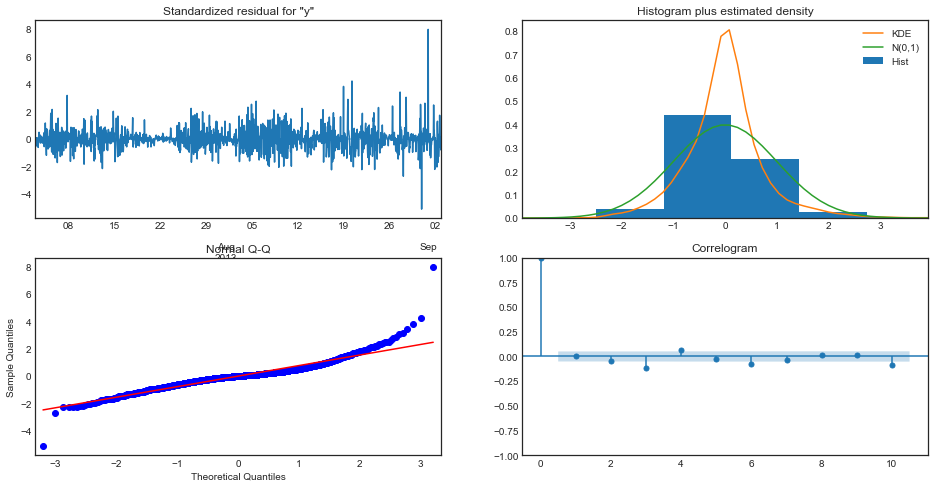

In [126]:
res.plot_diagnostics(figsize=(16, 8))
plt.show()

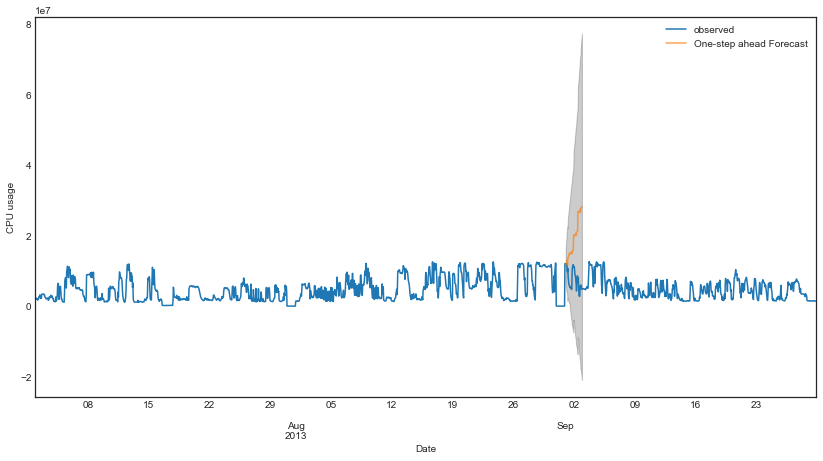

In [127]:
pred = res.get_prediction(start=pd.to_datetime('2013-09-01'), dynamic=True)
pred_ci = pred.conf_int()

ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CPU usage')
plt.legend()

plt.show()

In [128]:
df =hourlydat['CPU usage [MHZ]']
df['2013':]

Timestamp
2013-06-30 22:00:00    1.677022e+06
2013-06-30 23:00:00    1.817519e+06
2013-07-01 00:00:00    1.719936e+06
2013-07-01 01:00:00    1.649799e+06
2013-07-01 02:00:00    1.731963e+06
                           ...     
2013-09-29 17:00:00    1.420654e+06
2013-09-29 18:00:00    1.428400e+06
2013-09-29 19:00:00    1.429791e+06
2013-09-29 20:00:00    1.428487e+06
2013-09-29 21:00:00    1.422804e+06
Freq: H, Name: CPU usage [MHZ], Length: 2184, dtype: float64

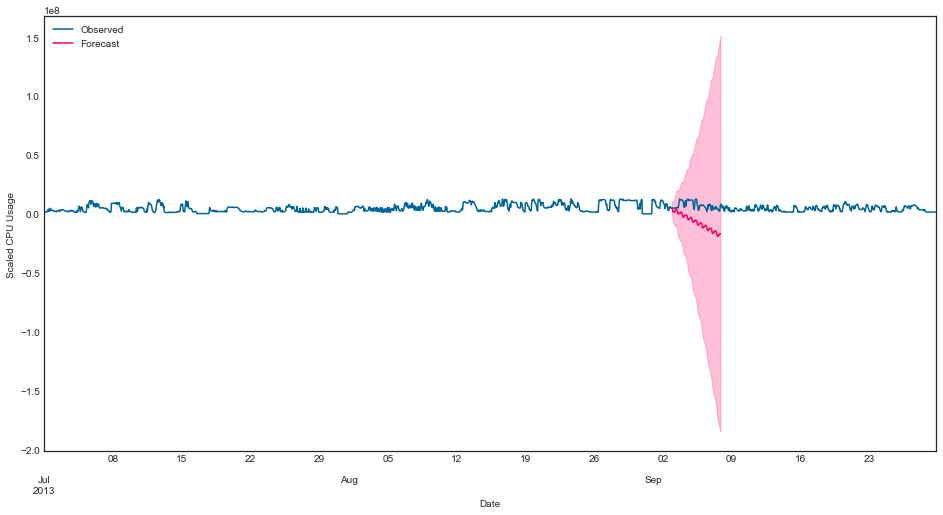

In [129]:
pred_uc = res.get_forecast(steps=120)
 
# get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
 
# plot time series and long-term forecast
ax = df.plot(label='Observed', figsize=(16, 8), color='#006699');
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='#ff0066');
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
ax.set_xlabel('Date');
ax.set_ylabel('Scaled CPU Usage');
plt.legend(loc='upper left')
plt.show()

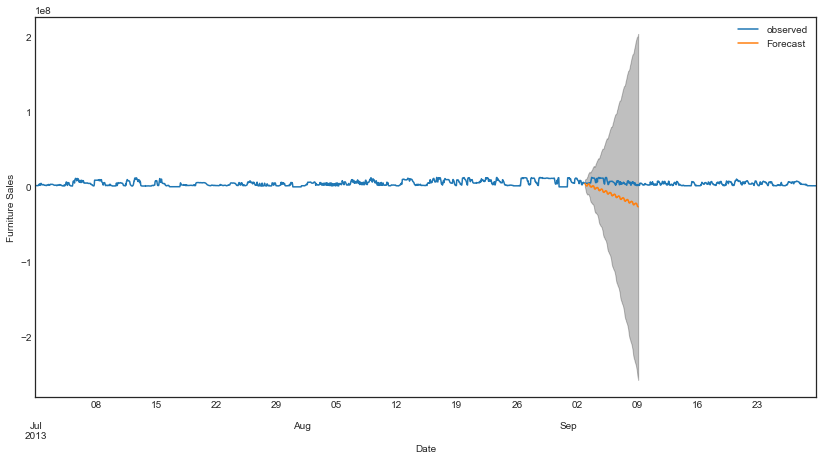

In [130]:
pred_uc = res.get_forecast(steps=150)
pred_ci = pred_uc.conf_int()

ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [131]:
from sklearn.metrics import mean_absolute_error as mae

a = []
for _ in range(2184):
    a.append(1)
b = []
for _ in range(46):
    a.append(1)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mean_squared_error(y_true,y_pred):
    return np.mean(np.abs(y_true - y_pred))**2  


def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(np.mean(np.abs(y_true - y_pred))**2)



y_forecasted = pred.predicted_mean
y_truth = df['2013':]
mape = mean_absolute_percentage_error( y_forecasted,y_truth)
print("Mean absolute percentage Error: {0:.2f}%".format(mape))

mse =  mean_squared_error(y_truth,y_forecasted)


print("Mean squared Error: "+ str(mse))
print("Root mean squared error is: "+ str(rmse))


Mean absolute percentage Error: 54.88%
Mean squared Error: 134899959113184.97
Root mean squared error is: 1331677.1350754388


In [132]:
#pip install plotly ok why 

### LSTM model

In [208]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from math import sqrt
import sys
from scipy import spatial

In [209]:
#pip install keras


In [210]:
#pip install tensorflow

In [211]:

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit 
import keras
import matplotlib.pyplot as plt


In [212]:
print(X.shape)

(1, 2184)


In [213]:
print(X.shape)
X = hourlydat['CPU usage [MHZ]']
X=X.values.reshape(1, -1)

X = X.astype('float32')

#scaler = MinMaxScaler(feature_range=(0, 1))
#X = scaler.fit_transform(X)
#X= scaler.inverse_transform(X)
print(X.shape)

(1, 2184)
(1, 2184)


In [214]:
 
tscv = TimeSeriesSplit(n_splits=5)

def timeseries_train_test_split(X, y, test_size):
    
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

#look_back = 1
#X_train, y_train = create_dataset(train, look_back)
#X_test, y_test = create_dataset(test, look_back)
#X_test=X_test.to_numpy()
#y_train=y_train.to_numpy()
#y_test=y_test.to_numpy()
#X_train=X_train.to_numpy()
X_train = X_train.reshape(1512, 1,29)
X_test = X_test.reshape(648, 1, 29)
#y_train = y_train.reshape(1512, 1)
#y_test = y_test.reshape(648, 1)
#X_valid = np.reshape(X_valid, (X_valid.shape[0], 1, X_valid.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print (y_test.shape)


(648, 1)


In [215]:
print (y_test.shape)
print (X_test.shape)
print (y_train.shape)
print (X_train.shape)
X_train = X_train.reshape(1512, 1,29)
X_test = X_test.reshape(648, 1, 29)
#y_train = y_train.reshape(1512, 1)
#y_train = scaler.fit_transform(y_train)
#y_train=scaler.inverse_transform(y_train)
#testPredict = scaler.fit_transform(testPredict)
#testPredict = scaler.inverse_transform(testPredict)
#y_test= scaler.fit_transform(y_test)
#y_test=scaler.inverse_transform(y_test)

(648, 1)
(648, 1, 29)
(1512, 1)
(1512, 1, 29)


In [216]:

model = keras.models.Sequential()
#model.add(keras.layers.LSTM(128, batch_input_shape=(None,1512,25),return_sequences=True))
model.add(keras.layers.LSTM(128, input_shape=(1, 29), return_sequences=True))
model.add(keras.layers.LSTM(128, return_sequences=True))


model.add(keras.layers.Dense(1))

In [217]:

model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['mape'])


In [218]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 128)            80896     
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 128)            131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1, 1)              129       
Total params: 212,609
Trainable params: 212,609
Non-trainable params: 0
_________________________________________________________________


In [219]:
#history = [x for x in train]
history = model.fit(X_train, y_train, validation_split=0.2,epochs=50, batch_size=64, verbose=2)

Epoch 1/50
19/19 - 6s - loss: 0.0660 - mape: 4106719.7500 - val_loss: 0.1667 - val_mape: 11238762.0000
Epoch 2/50
19/19 - 0s - loss: 0.0446 - mape: 4065278.2500 - val_loss: 0.1326 - val_mape: 15512953.0000
Epoch 3/50
19/19 - 0s - loss: 0.0408 - mape: 3324198.2500 - val_loss: 0.1355 - val_mape: 14965726.0000
Epoch 4/50
19/19 - 0s - loss: 0.0390 - mape: 3364737.2500 - val_loss: 0.1482 - val_mape: 13156000.0000
Epoch 5/50
19/19 - 0s - loss: 0.0383 - mape: 3052030.7500 - val_loss: 0.1533 - val_mape: 12828575.0000
Epoch 6/50
19/19 - 0s - loss: 0.0376 - mape: 2886859.0000 - val_loss: 0.1498 - val_mape: 13503772.0000
Epoch 7/50
19/19 - 0s - loss: 0.0367 - mape: 2823562.2500 - val_loss: 0.1286 - val_mape: 15049684.0000
Epoch 8/50
19/19 - 0s - loss: 0.0360 - mape: 2628082.7500 - val_loss: 0.1478 - val_mape: 13289258.0000
Epoch 9/50
19/19 - 0s - loss: 0.0366 - mape: 2539820.7500 - val_loss: 0.1507 - val_mape: 13180485.0000
Epoch 10/50
19/19 - 0s - loss: 0.0360 - mape: 2316454.7500 - val_loss: 0.

In [220]:
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#y_train =y_train.reshape(1512, 1)
#y_test =y_test.reshape(648, 1)
#testPredict = testPredict.reshape(648, 1)
#y_train = scaler.fit_transform(y_train)
#testPredict = scaler.fit_transform(testPredict)
#testPredict = scaler.inverse_transform(testPredict)
#y_test= scaler.fit_transform(y_test)
#y_train = scaler.fit_transform(y_train)
#y_train = scaler.inverse_transform(y_train)
#trainPredict = scaler.fit_transform(trainPredict)
#y_test = scaler.inverse_transform(y_test)
#testPredict = scaler.fit_transform(testPredict)
#trainPredict = scaler.inverse_transform(trainPredict)

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
trainPredict = trainPredict.reshape(1512, 1)
testPredict = testPredict.reshape(648, 1)
print(testPredict.shape)
print(trainPredict.shape)


(1512, 1, 29)
(648, 1, 29)
(1512, 1)
(648, 1)
(648, 1)
(1512, 1)


In [221]:
model.evaluate(X_test,y_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.0668 - mape: 597141.7500


[0.06683679670095444, 597141.75]

In [222]:
model.metrics_names

['loss', 'mape']

In [223]:
print(y_test)

[[3.04134794e-01]
 [3.12985408e-01]
 [3.23081940e-01]
 [3.18260793e-01]
 [3.15591606e-01]
 [3.12011913e-01]
 [3.07762636e-01]
 [3.03154221e-01]
 [3.06065882e-01]
 [2.92316662e-01]
 [3.22660212e-01]
 [3.30584902e-01]
 [3.47136772e-01]
 [3.70098153e-01]
 [3.35139683e-01]
 [3.34635543e-01]
 [3.31305683e-01]
 [5.60877944e-01]
 [8.27646476e-01]
 [1.00000000e+00]
 [9.48316630e-01]
 [9.46891806e-01]
 [9.31013517e-01]
 [9.08755659e-01]
 [9.13112515e-01]
 [9.20328501e-01]
 [9.26083672e-01]
 [8.47124434e-01]
 [7.93107396e-01]
 [5.87349245e-01]
 [3.82857208e-01]
 [3.63196198e-01]
 [6.43470883e-01]
 [8.63123130e-01]
 [8.76743257e-01]
 [4.55362365e-01]
 [8.55620613e-01]
 [9.04322165e-01]
 [9.44886077e-01]
 [9.93261959e-01]
 [9.31480448e-01]
 [8.66419765e-01]
 [9.71060640e-01]
 [9.40225747e-01]
 [9.05614770e-01]
 [9.08029030e-01]
 [9.10235705e-01]
 [9.02832439e-01]
 [9.07031682e-01]
 [9.18928218e-01]
 [9.23078005e-01]
 [9.14520751e-01]
 [7.71214364e-01]
 [4.60144729e-01]
 [3.05276774e-01]
 [2.027025

In [224]:
#y_train=y_train.to_numpy()
#y_train.reshape(4536, 1)
#X = X.reshape(2184, 3)
#np.resize(trainPredict,(1512,1))
print(trainPredict.shape)

(1512, 1)


In [225]:
from pandas import datetime
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error = mean_absolute_error(y_test, testPredict)
classifi = r2_score(y_test,testPredict,multioutput='variance_weighted')
mse =  mean_squared_error(y_test,testPredict)
rmse = mean_squared_error(y_test,testPredict, squared=False)
var = explained_variance_score(y_test,testPredict)
testPredict = testPredict.reshape(648, )
mape = mean_absolute_percentage_error(testPredict,y_test)

#msle = mean_squared_log_error(y_train,trainPredict)

print("Mean squared Error: "+ str(mse))
print("Root mean squared error is: "+ str(rmse))
print("Mean absolute percentage Error: {0:.2f}%".format(mape))
#print("Mean squared log error: {0:.2f}".format(msle))
print("Explained variance score: {0:.2f}".format(var))     
print("r2 score is {0:.2f}".format(classifi))
print("Mean Absolute Error: {0:.2f}".format(error))



Mean squared Error: 0.06683678825578279
Root mean squared error is: 0.2585281188880289
Mean absolute percentage Error: 65.89%
Explained variance score: -0.08
r2 score is -0.24
Mean Absolute Error: 0.21


In [226]:
scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
y_train =y_train.reshape(1512, 1)
y_test =y_test.reshape(648, 1)
testPredict = testPredict.reshape(648, 1)
y_train = scaler.fit_transform(y_train)
y_train = scaler.inverse_transform(y_train)
trainPredict = scaler.fit_transform(trainPredict)
y_test = scaler.inverse_transform(y_test)
testPredict = scaler.fit_transform(testPredict)
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.fit_transform(y_train)
testPredict = scaler.fit_transform(testPredict)
y_test= scaler.fit_transform(y_test)

In [227]:
trainScore = math.sqrt(mean_squared_error(y_train[:], trainPredict[:]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[:], testPredict[:]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.22 RMSE
Test Score: 0.27 RMSE


In [228]:
testPredict = testPredict.reshape(648, )

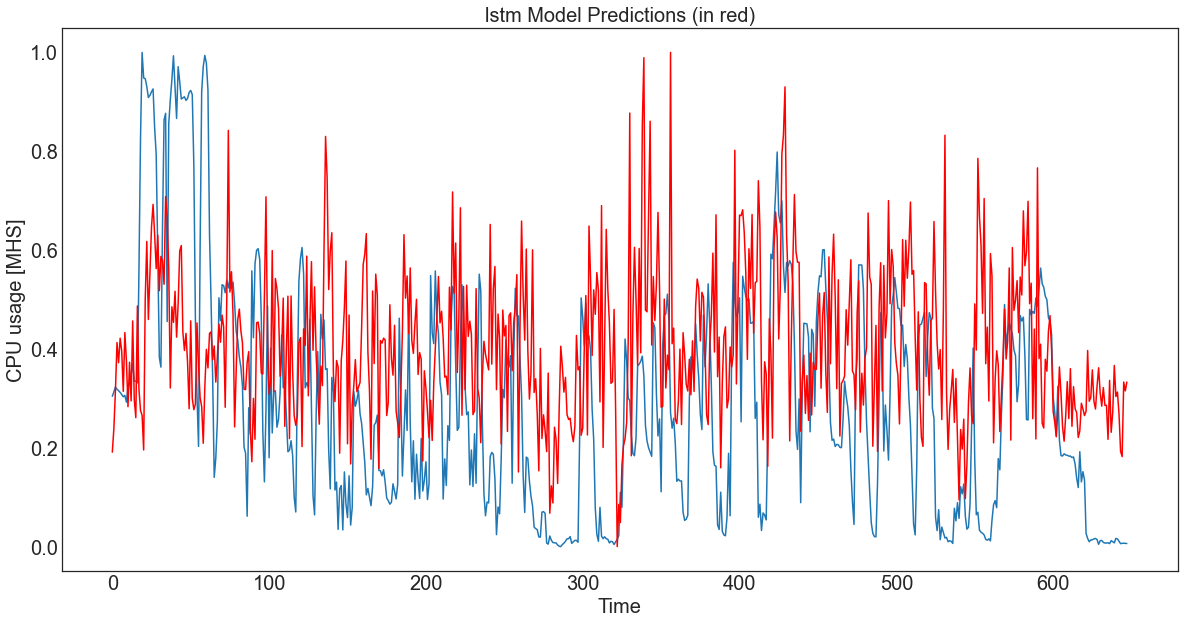

In [229]:
testnew = y_test

prednew = testPredict

plt.figure(figsize=(20,10))
plt.plot(testnew)
plt.plot(prednew, color='red')
plt.tick_params(labelsize=20)
plt.title("lstm Model Predictions (in red)", fontsize = 20)
plt.ylabel("CPU usage [MHS]", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.show();

In [89]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pandas_datareader.data as web
import seaborn as sns
import sklearn
from sklearn.ensemble import (
    BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeRegressor

In [90]:
random_state = 42
n_jobs = 1  # Parallelisation factor for bagging, random forests
n_estimators = 1000
step_factor = 10
axis_step = int(n_estimators/step_factor)

In [91]:
estimators = np.zeros(axis_step)
bagging_mse = np.zeros(axis_step)
rf_mse = np.zeros(axis_step)
boosting_mse = np.zeros(axis_step)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(1512, 22)
(648, 22)
(648,)


In [94]:
for i in range(0, axis_step):
    print("Bagging Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    bagging = BaggingRegressor(
        DecisionTreeRegressor(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    bagging.fit(X_train, y_train)
    mse = mean_squared_error(y_test, bagging.predict(X_test))
    estimators[i] = step_factor*(i+1)
    bagging_mse[i] = mse

Bagging Estimator: 10 of 1000...
Bagging Estimator: 20 of 1000...
Bagging Estimator: 30 of 1000...
Bagging Estimator: 40 of 1000...
Bagging Estimator: 50 of 1000...
Bagging Estimator: 60 of 1000...
Bagging Estimator: 70 of 1000...
Bagging Estimator: 80 of 1000...
Bagging Estimator: 90 of 1000...
Bagging Estimator: 100 of 1000...
Bagging Estimator: 110 of 1000...
Bagging Estimator: 120 of 1000...
Bagging Estimator: 130 of 1000...
Bagging Estimator: 140 of 1000...
Bagging Estimator: 150 of 1000...
Bagging Estimator: 160 of 1000...
Bagging Estimator: 170 of 1000...
Bagging Estimator: 180 of 1000...
Bagging Estimator: 190 of 1000...
Bagging Estimator: 200 of 1000...
Bagging Estimator: 210 of 1000...
Bagging Estimator: 220 of 1000...
Bagging Estimator: 230 of 1000...
Bagging Estimator: 240 of 1000...
Bagging Estimator: 250 of 1000...
Bagging Estimator: 260 of 1000...
Bagging Estimator: 270 of 1000...
Bagging Estimator: 280 of 1000...
Bagging Estimator: 290 of 1000...
Bagging Estimator: 300 

In [95]:
for i in range(0, axis_step):
    print("Random Forest Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    rf = RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
    rf.fit(X_train, y_train)
    mse = mean_squared_error(y_test, rf.predict(X_test))
    estimators[i] = step_factor*(i+1)
    rf_mse[i] = mse

Random Forest Estimator: 10 of 1000...
Random Forest Estimator: 20 of 1000...
Random Forest Estimator: 30 of 1000...
Random Forest Estimator: 40 of 1000...
Random Forest Estimator: 50 of 1000...
Random Forest Estimator: 60 of 1000...
Random Forest Estimator: 70 of 1000...
Random Forest Estimator: 80 of 1000...
Random Forest Estimator: 90 of 1000...
Random Forest Estimator: 100 of 1000...
Random Forest Estimator: 110 of 1000...
Random Forest Estimator: 120 of 1000...
Random Forest Estimator: 130 of 1000...
Random Forest Estimator: 140 of 1000...
Random Forest Estimator: 150 of 1000...
Random Forest Estimator: 160 of 1000...
Random Forest Estimator: 170 of 1000...
Random Forest Estimator: 180 of 1000...
Random Forest Estimator: 190 of 1000...
Random Forest Estimator: 200 of 1000...
Random Forest Estimator: 210 of 1000...
Random Forest Estimator: 220 of 1000...
Random Forest Estimator: 230 of 1000...
Random Forest Estimator: 240 of 1000...
Random Forest Estimator: 250 of 1000...
Random Fo

In [96]:
for i in range(0, axis_step):
    print("Boosting Estimator: %d of %d..." % (
        step_factor*(i+1), n_estimators)
    )
    boosting = AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
    boosting.fit(X_train, y_train)
    mse = mean_squared_error(y_test, boosting.predict(X_test))
    estimators[i] = step_factor*(i+1)
    boosting_mse[i] = mse

Boosting Estimator: 10 of 1000...
Boosting Estimator: 20 of 1000...
Boosting Estimator: 30 of 1000...
Boosting Estimator: 40 of 1000...
Boosting Estimator: 50 of 1000...
Boosting Estimator: 60 of 1000...
Boosting Estimator: 70 of 1000...
Boosting Estimator: 80 of 1000...
Boosting Estimator: 90 of 1000...
Boosting Estimator: 100 of 1000...
Boosting Estimator: 110 of 1000...
Boosting Estimator: 120 of 1000...
Boosting Estimator: 130 of 1000...
Boosting Estimator: 140 of 1000...
Boosting Estimator: 150 of 1000...
Boosting Estimator: 160 of 1000...
Boosting Estimator: 170 of 1000...
Boosting Estimator: 180 of 1000...
Boosting Estimator: 190 of 1000...
Boosting Estimator: 200 of 1000...
Boosting Estimator: 210 of 1000...
Boosting Estimator: 220 of 1000...
Boosting Estimator: 230 of 1000...
Boosting Estimator: 240 of 1000...
Boosting Estimator: 250 of 1000...
Boosting Estimator: 260 of 1000...
Boosting Estimator: 270 of 1000...
Boosting Estimator: 280 of 1000...
Boosting Estimator: 290 of 10

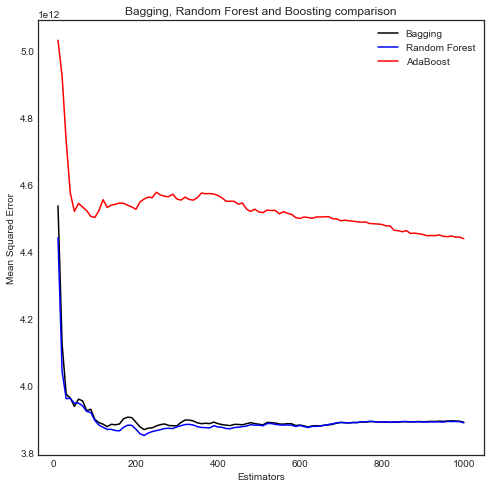

In [97]:
plt.figure(figsize=(8, 8))
plt.title('Bagging, Random Forest and Boosting comparison')
plt.plot(estimators, bagging_mse, 'b-', color="black", label='Bagging')
plt.plot(estimators, rf_mse, 'b-', color="blue", label='Random Forest')
plt.plot(estimators, boosting_mse, 'b-', color="red", label='AdaBoost')
plt.legend(loc='upper right')
plt.xlabel('Estimators')
plt.ylabel('Mean Squared Error')
plt.show()

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


In [99]:
from xgboost import XGBRegressor


In [123]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train_scaled, y_train, verbose=False)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
print(y_test.shape)
y_test=y_test.reshape(653,)

(653,)


Mean squared Error: 4144526818612.6753
Root mean squared error is: 2035811.0960039184
Mean absolute percentage Error:43.74%
Mean squared log error: 0.22
Explained variance score: 0.39
r2 score is 0.39
Mean Absolute Error: 1606047.41


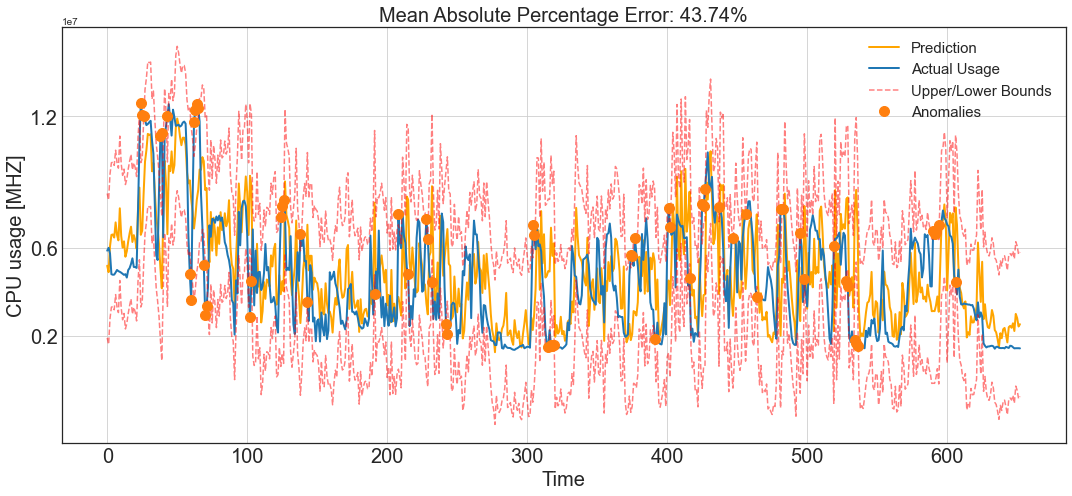

In [131]:
plotModelResults(my_model, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [132]:
my_model =AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
my_model.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.01,
                  random_state=42)

Mean squared Error: 4104508623021.6533
Root mean squared error is: 2025958.692328561
Mean absolute percentage Error:36.34%
Mean squared log error: 0.19
Explained variance score: 0.40
r2 score is 0.39
Mean Absolute Error: 1491857.66


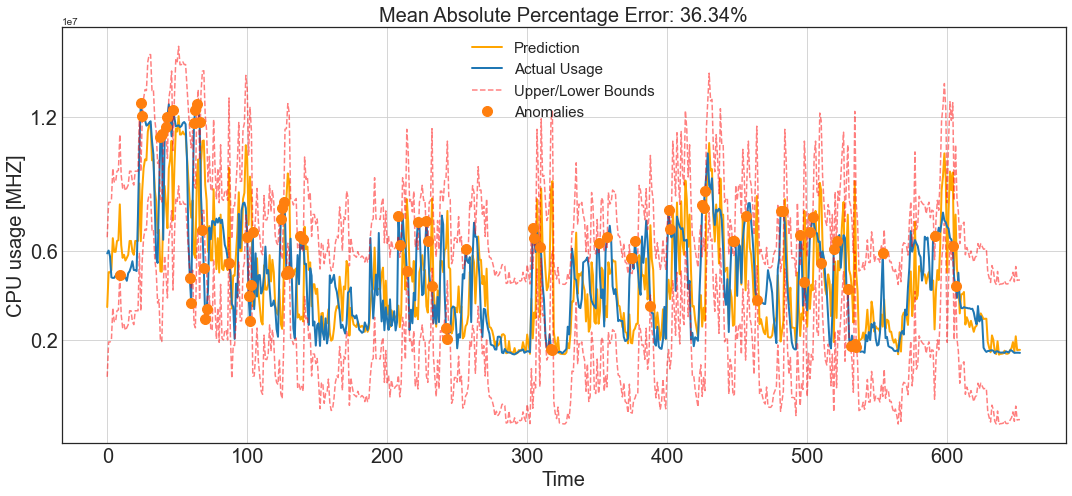

In [133]:
plotModelResults(my_model, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [134]:
my_model =RandomForestRegressor(
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
my_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=1, random_state=42)

Mean squared Error: 3661772450434.2114
Root mean squared error is: 1913575.8282425632
Mean absolute percentage Error:40.06%
Mean squared log error: 0.19
Explained variance score: 0.47
r2 score is 0.46
Mean Absolute Error: 1510785.72


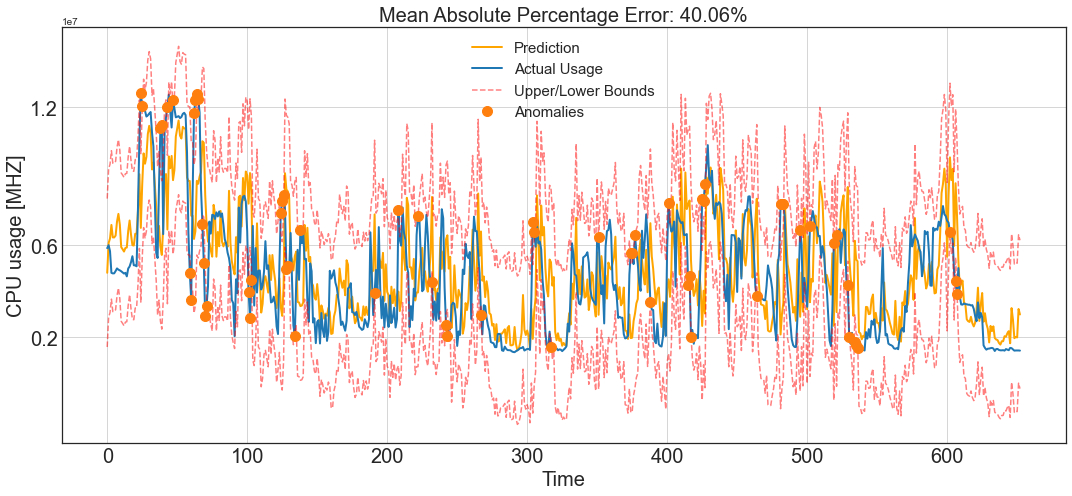

In [135]:
plotModelResults(my_model, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [136]:
my_model =BaggingRegressor(
        DecisionTreeRegressor(), 
        n_estimators=step_factor*(i+1),
        n_jobs=n_jobs,
        random_state=random_state
    )
my_model.fit(X_train_scaled, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50,
                 n_jobs=1, random_state=42)

Mean squared Error: 3688018791275.1714
Root mean squared error is: 1920421.5139586339
Mean absolute percentage Error:39.95%
Mean squared log error: 0.19
Explained variance score: 0.46
r2 score is 0.46
Mean Absolute Error: 1506267.72


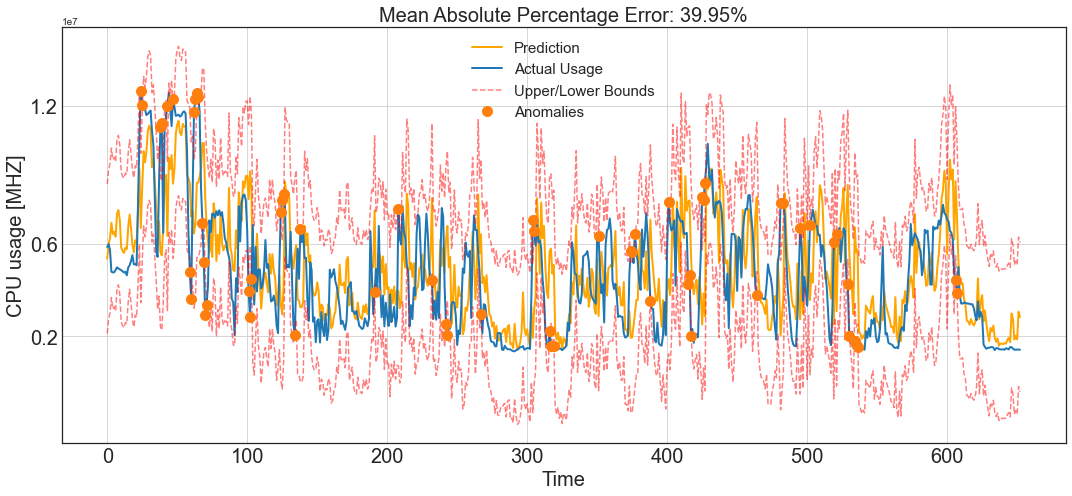

In [137]:
plotModelResults(my_model, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [139]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.5,
          'loss': 'ls'}
GB_model= GradientBoostingRegressor(**params)
GB_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=4, min_samples_split=5,
                          n_estimators=500)

Mean squared Error: 4950235330629.827
Root mean squared error is: 2224912.4321262236
Mean absolute percentage Error:46.75%
Mean squared log error: 0.26
Explained variance score: 0.28
r2 score is 0.27
Mean Absolute Error: 1737167.46


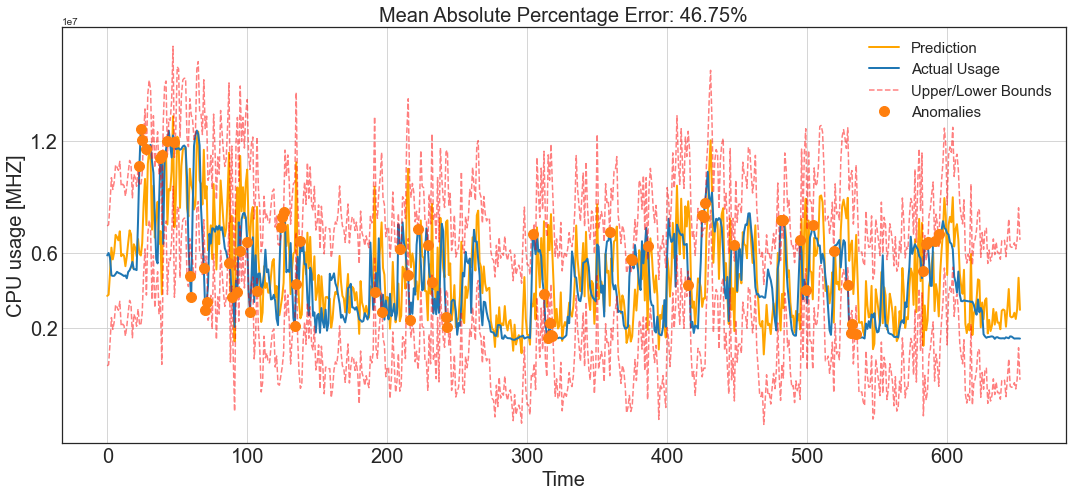

In [140]:
plotModelResults(GB_model, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [141]:
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.5,
          'loss': 'ls'}
my_model =AdaBoostRegressor(
        DecisionTreeRegressor(),
        n_estimators=step_factor*(i+1),
        random_state=random_state,
        learning_rate=0.01
    )
GB_model= GradientBoostingRegressor(**params) 
lin_model = Lasso(alpha=0.005, random_state=0)
RF_model = RandomForestRegressor(n_estimators=1000,random_state=0)

estimators = [('ADA', my_model),
              ('Lasso', lin_model),
              ('GB', GB_model)]
#Stack these models with StackingRegressor
st_model = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())
st_model.fit(X_train_scaled, y_train)

StackingRegressor(estimators=[('ADA',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                                 learning_rate=0.01,
                                                 random_state=42)),
                              ('Lasso', Lasso(alpha=0.005, random_state=0)),
                              ('GB',
                               GradientBoostingRegressor(learning_rate=0.5,
                                                         max_depth=4,
                                                         min_samples_split=5,
                                                         n_estimators=1000))],
                  final_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ])))

In [89]:
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# to divide train and test set
from sklearn.model_selection import train_test_split
# feature scaling
from sklearn.preprocessing import MinMaxScaler
#to buid models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# models for Stacking
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
# to evaluate the model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error,r2_score
import math
#to find training time of the model
import time
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')

In [90]:
data = pd.read_csv('hourlydat.csv')
data.head()

Timestamp  Timestamp [ms]  CPU cores  \
0  2013-06-30 22:00:00   7000420415400      14040   
1  2013-06-30 23:00:00   7000438772425      14040   
2  2013-07-01 00:00:00   7000457135400      14040   
3  2013-07-01 01:00:00   7000475496903      14040   
4  2013-07-01 02:00:00   7000493860500      14040   

   CPU capacity provisioned [MHZ]  CPU usage [MHZ]  CPU usage [%]  \
0                    3.812018e+07     1.677022e+06   19372.219544   
1                    3.812018e+07     1.817519e+06   21302.382630   
2                    3.812018e+07     1.719936e+06   19897.298070   
3                    3.812018e+07     1.649799e+06   19546.600496   
4                    3.812018e+07     1.731963e+06   20524.195406   

   Memory capacity provisioned [KB]  Memory usage [KB]  \
0                      4.871188e+10       1.855677e+09   
1                      4.871215e+10       1.805727e+09   
2                      4.871231e+10       1.742155e+09   
3                      4.871278e+10       1.724193e+09   
4                      4.871361e+10       1.782729e+09   

   Disk read throughput [KB/s]  Disk write throughput [KB/s]  \
0                 7.029850e+05                  4.193359e+05   
1                 9.123973e+05                  5.972818e+05   
2                 9.670129e+05                  1.122391e+06   
3                 1.628856e+06                  9.403050e+05   
4                 1.413094e+06                  1.108244e+06   

   Network received throughput [KB/s]  Network transmitted throughput [KB/s]  \
0                       183190.941026                          342367.547436   
1                       242444.979121                          408352.440293   
2                       279554.250216                          479341.768398   
3                       221960.783333                          486785.550000   
4                       194033.990476                          347217.573810   

   weekday  weekend  month     day  CPU usage prev    CPU_diff  received_prev  \
0    30600   5100.0  30600  153000    19414.112996  -43.393452  180831.050549   
1    30600   5100.0  30600  153000    21076.695130  225.687500  241262.312454   
2        0      0.0  35700    5100    20141.976542 -244.678472  277536.650216   
3        0      0.0  35700    5100    19328.684524  217.915972  225730.983333   
4        0      0.0  35700    5100    20509.355128   14.840278  193461.190476   

   received_diff  transmitted_prev  transmitted_diff  
0    2359.623810     326200.323626      16165.757143  
1    1182.666667     408959.506960       -607.066667  
2    2017.600000     473957.901732       5383.866667  
3   -3770.200000     480794.416667       5991.133333  
4     572.800000     362464.440476     -15246.866667

In [91]:
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
GB_model= GradientBoostingRegressor(**params) 
lin_model = Lasso(alpha=0.005, random_state=0)
RF_model = RandomForestRegressor(n_estimators=400,random_state=0)
mod = sm.tsa.arima.ARIMA(hourlydat['CPU usage [MHZ]'], order=(5, 1, 0), trend=None)
# Get these models in a list
estimators = [('Random Forest', RF_model),
              ('Lasso', lin_model),
              ('GB', GB_model)]
#Stack these models with StackingRegressor
stacking_regressor = StackingRegressor(estimators=estimators,
                                       final_estimator=RidgeCV())

In [97]:
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('True')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + 'n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)

In [96]:
print(X_train.shape)
X_train=X_train.values.reshape(-1,28)
print(X_test.shape)
X_test=X_test.values.reshape(-1,28)

(1522, 14)
(653, 14)


ValueError: cannot reshape array of size 9142 into shape (28)

ValueError: Found input variables with inconsistent numbers of samples: [761, 1522]

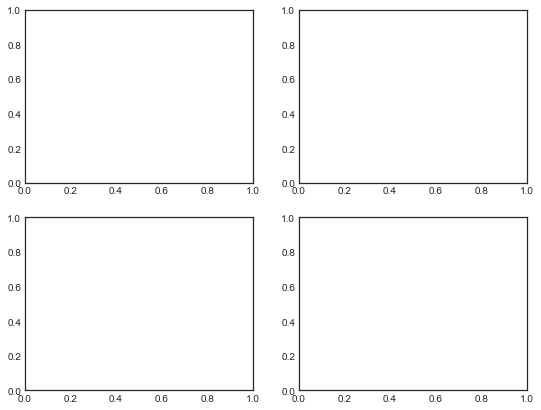

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(9, 7))
axs = np.ravel(axs)
errors_list=[]
for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    start_time = time.time()
    model1 = est.fit(X_train, y_train)
                     
    elapsed_time = time.time() - start_time
    pred = model1.predict(X_test)
    mape = np.mean(np.abs((y_test - pred) /pred)) * 100
    
    errors = y_test - model1.predict(X_test)
    errors_list.append(errors)
 #   test_r2= r2_score(np.exp(y_test), np.exp(pred))
    
    test_rmse= math.sqrt(mean_squared_error(y_test, pred))
    plot_regression_results(ax,y_test,pred,name,(r'$R^2={:.2f}$' + '\n' + 
                            r'$RMSE={:.3f}$').format(mape,test_rmse),elapsed_time)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

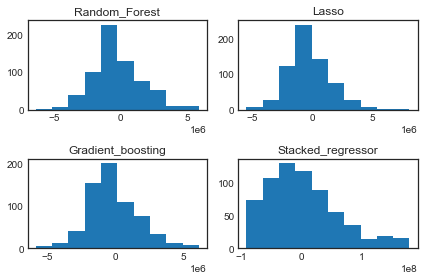

In [95]:
titles = ['Random_Forest','Lasso','Gradient_boosting','Stacked_regressor'] 
f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(errors_list[idx])
    ax.set_title(titles[idx])
plt.tight_layout()